In [1]:
## Importing Libraries
import os
import re
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm 
from ultralytics import YOLO
import tensorflow as tf

In [2]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


In [3]:
dataset_dir=os.getcwd()+"\\Dustbin_Classification_Dataset"
print("There are Total of",len(os.listdir(dataset_dir)),"Class :-\n")
classes=os.listdir(dataset_dir)
for i in classes:
    print("* ",i)

There are Total of 2 Class :-

*  Full
*  Not_Full


In [4]:
for subfolder in os.listdir(dataset_dir):
    count= len(os.listdir(dataset_dir+"//"+subfolder))
    print("There are total of ",count," Images for ",subfolder,"Class") 

There are total of  300  Images for  Full Class
There are total of  523  Images for  Not_Full Class


In [5]:
## Displaying Samples for each Class


Samples of Full Class


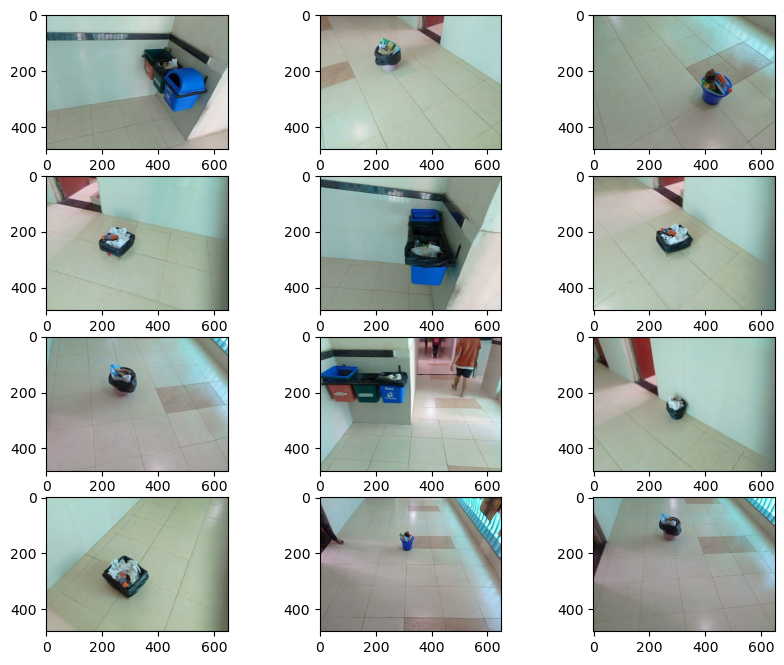

In [6]:
print("\nSamples of",classes[0],"Class")
subfolder=classes[0]
fig=plt.figure(figsize=(10,8))
columns=3
rows=4
files = os.listdir(dataset_dir+"//"+subfolder)
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(dataset_dir+"//"+subfolder+"//"+file)
    img=bigger = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (650,480 ))    
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
plt.show()


Samples of Not_Full Class


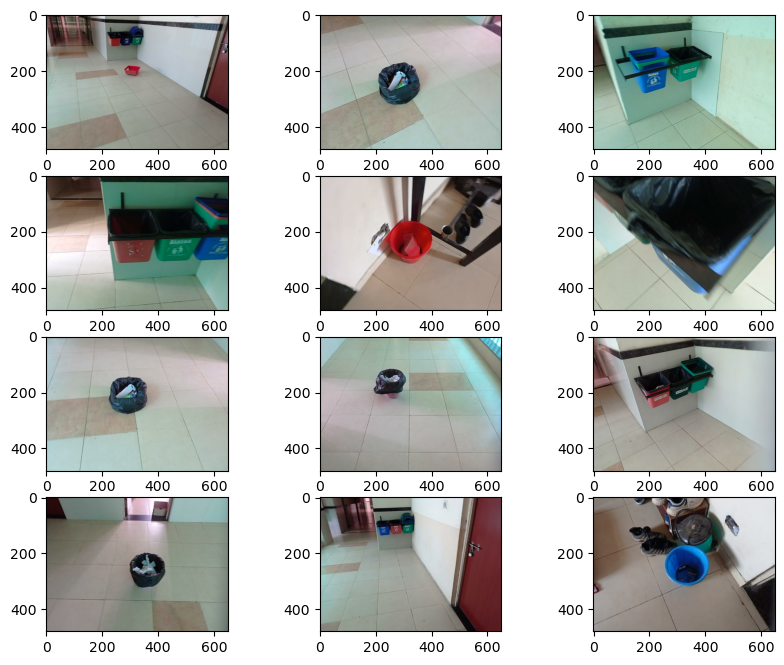

In [7]:
print("\nSamples of",classes[1],"Class")
subfolder=classes[1]
fig=plt.figure(figsize=(10,8))
columns=3
rows=4
files = os.listdir(dataset_dir+"//"+subfolder)
for i in range(1,columns*rows +1):
    file=random.choice(files)
    img=cv2.imread(dataset_dir+"//"+subfolder+"//"+file)
    img=bigger = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (650,480 ))    
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
plt.show()

In [8]:
## Cropping each Image to detect Dustbin Cordinates.

In [9]:
model=YOLO(os.getcwd()+"\\runs_for_Dustbin_Detection\\detect\\train\\weights\\best.pt")

In [22]:
# Datagen=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,horizontal_flip=True,fill_mode='nearest')

In [10]:
img_dim=(256,256)
new_dataset_dir=os.getcwd()+"\\New_Dataset"
if not os.path.isdir(new_dataset_dir):
    print("Creating New Dataset Folder.")
    os.mkdir(new_dataset_dir)
else:
    print("Dataset Folder Found.")
    
for singleclass in classes:
    input_dir=dataset_dir+"\\"+singleclass
    output_dir=new_dataset_dir+"\\"+singleclass
    if( not os.path.isdir(output_dir)):
        print("Creating ",output_dir)
        os.mkdir(output_dir)
    else:
        print(singleclass," Directory Found.")
    for input_file in tqdm(os.listdir(input_dir),"Processing Image :- "):
        file_path=input_dir+"\\"+input_file
        img=cv2.imread(file_path)
        cordinates=model.predict(img)[0].boxes.xyxy
        i=1
        for (x1,y1,x2,y2) in cordinates:
            x1=int(x1)
            x2=int(x2)
            y1=int(y1)
            y2=int(y2)
            # frame = cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 3)  
            image=cv2.resize(img[y1:y2,x1:x2],img_dim)
            output_file=output_dir+"\\"+input_file.split('.')[0]+"_"+str(i)+"."+input_file.split('.')[1]
            i=i+1
            cv2.imwrite(output_file,image)
        # img=tf.keras.preprocessing.image.load_img(output_file)
        # x=tf.keras.preprocessing.image.img_to_array(img)
        # x=x.reshape((1,)+x.shape)
        # i=0
        # for batch in Datagen.flow(x,batch_size=1,save_to_dir=output_dir,save_prefix="Augment_",save_format="png"):
        #     if(i>10):
        #         break
        #     else:
        #         i=i+1
        
        

Creating New Dataset Folder.
Creating  C:\Users\bhara\Dustbin_Classification\New_Dataset\Full


Processing Image :- :   0%|                                                                    | 0/300 [00:00<?, ?it/s]


0: 480x640 1 dustbin, 192.6ms
Speed: 7.0ms preprocess, 192.6ms inference, 10.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   0%|▏                                                           | 1/300 [00:02<11:55,  2.39s/it]


0: 480x640 1 dustbin, 136.4ms
Speed: 4.1ms preprocess, 136.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▍                                                           | 2/300 [00:02<05:22,  1.08s/it]


0: 480x640 1 dustbin, 130.4ms
Speed: 4.0ms preprocess, 130.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▌                                                           | 3/300 [00:02<03:15,  1.52it/s]


0: 480x640 1 dustbin, 124.3ms
Speed: 4.0ms preprocess, 124.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▊                                                           | 4/300 [00:02<02:15,  2.19it/s]


0: 480x640 1 dustbin, 137.0ms
Speed: 4.0ms preprocess, 137.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█                                                           | 5/300 [00:03<01:43,  2.86it/s]


0: 480x640 1 dustbin, 105.6ms
Speed: 3.1ms preprocess, 105.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█▏                                                          | 6/300 [00:03<01:20,  3.66it/s]


0: 480x640 1 dustbin, 107.1ms
Speed: 3.3ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█▍                                                          | 7/300 [00:03<01:06,  4.43it/s]


0: 480x640 1 dustbin, 106.6ms
Speed: 3.0ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▌                                                          | 8/300 [00:03<00:56,  5.15it/s]


0: 480x640 1 dustbin, 118.7ms
Speed: 2.0ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▊                                                          | 9/300 [00:03<00:51,  5.64it/s]


0: 480x640 1 dustbin, 129.4ms
Speed: 3.6ms preprocess, 129.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▉                                                         | 10/300 [00:03<00:48,  5.93it/s]


0: 480x640 1 dustbin, 103.0ms
Speed: 4.0ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▏                                                        | 11/300 [00:03<00:44,  6.45it/s]


0: 480x640 1 dustbin, 110.2ms
Speed: 3.0ms preprocess, 110.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▎                                                        | 12/300 [00:03<00:42,  6.78it/s]


0: 480x640 1 dustbin, 113.5ms
Speed: 2.2ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▌                                                        | 13/300 [00:04<00:41,  6.97it/s]


0: 480x640 1 dustbin, 121.6ms
Speed: 3.0ms preprocess, 121.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|██▊                                                        | 14/300 [00:04<00:41,  6.97it/s]


0: 480x640 1 dustbin, 119.2ms
Speed: 4.0ms preprocess, 119.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|██▉                                                        | 15/300 [00:04<00:40,  6.98it/s]


0: 480x640 1 dustbin, 110.3ms
Speed: 4.0ms preprocess, 110.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|███▏                                                       | 16/300 [00:04<00:39,  7.16it/s]


0: 480x640 1 dustbin, 122.4ms
Speed: 3.0ms preprocess, 122.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▎                                                       | 17/300 [00:04<00:40,  7.07it/s]


0: 480x640 1 dustbin, 148.3ms
Speed: 12.0ms preprocess, 148.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▌                                                       | 18/300 [00:04<00:44,  6.39it/s]


0: 480x640 1 dustbin, 114.3ms
Speed: 2.6ms preprocess, 114.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▋                                                       | 19/300 [00:04<00:42,  6.64it/s]


0: 480x640 1 dustbin, 122.3ms
Speed: 2.8ms preprocess, 122.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|███▉                                                       | 20/300 [00:05<00:41,  6.74it/s]


0: 480x640 1 dustbin, 105.8ms
Speed: 3.1ms preprocess, 105.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|████▏                                                      | 21/300 [00:05<00:39,  7.01it/s]


0: 480x640 1 dustbin, 127.5ms
Speed: 3.4ms preprocess, 127.5ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|████▎                                                      | 22/300 [00:05<00:40,  6.86it/s]


0: 480x640 1 dustbin, 116.5ms
Speed: 2.0ms preprocess, 116.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▌                                                      | 23/300 [00:05<00:40,  6.91it/s]


0: 480x640 1 dustbin, 139.7ms
Speed: 2.4ms preprocess, 139.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▋                                                      | 24/300 [00:05<00:41,  6.70it/s]


0: 480x640 (no detections), 128.8ms
Speed: 3.5ms preprocess, 128.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▉                                                      | 25/300 [00:05<00:40,  6.77it/s]


0: 480x640 1 dustbin, 114.9ms
Speed: 3.2ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████                                                      | 26/300 [00:05<00:39,  6.90it/s]


0: 480x640 1 dustbin, 117.5ms
Speed: 2.4ms preprocess, 117.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████▎                                                     | 27/300 [00:06<00:39,  6.99it/s]


0: 480x640 1 dustbin, 108.9ms
Speed: 2.4ms preprocess, 108.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████▌                                                     | 28/300 [00:06<00:37,  7.20it/s]


0: 480x640 1 dustbin, 110.0ms
Speed: 3.2ms preprocess, 110.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|█████▋                                                     | 29/300 [00:06<00:36,  7.36it/s]


0: 480x640 1 dustbin, 89.0ms
Speed: 2.1ms preprocess, 89.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|█████▉                                                     | 30/300 [00:06<00:34,  7.80it/s]


0: 480x640 1 dustbin, 93.8ms
Speed: 2.0ms preprocess, 93.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|██████                                                     | 31/300 [00:06<00:33,  8.08it/s]


0: 480x640 1 dustbin, 129.1ms
Speed: 2.3ms preprocess, 129.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▎                                                    | 32/300 [00:06<00:35,  7.60it/s]


0: 480x640 1 dustbin, 102.8ms
Speed: 2.3ms preprocess, 102.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▍                                                    | 33/300 [00:06<00:34,  7.76it/s]


0: 480x640 1 dustbin, 98.9ms
Speed: 2.0ms preprocess, 98.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▋                                                    | 34/300 [00:06<00:33,  7.98it/s]


0: 480x640 1 dustbin, 112.2ms
Speed: 2.0ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|██████▉                                                    | 35/300 [00:07<00:33,  7.88it/s]


0: 480x640 1 dustbin, 121.0ms
Speed: 2.0ms preprocess, 121.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|███████                                                    | 36/300 [00:07<00:34,  7.59it/s]


0: 480x640 1 dustbin, 120.7ms
Speed: 3.1ms preprocess, 120.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|███████▎                                                   | 37/300 [00:07<00:35,  7.34it/s]


0: 480x640 1 dustbin, 118.7ms
Speed: 5.0ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▍                                                   | 38/300 [00:07<00:36,  7.24it/s]


0: 480x640 1 dustbin, 105.6ms
Speed: 2.5ms preprocess, 105.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▋                                                   | 39/300 [00:07<00:35,  7.42it/s]


0: 480x640 1 dustbin, 104.2ms
Speed: 2.0ms preprocess, 104.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▊                                                   | 40/300 [00:07<00:34,  7.59it/s]


0: 480x640 1 dustbin, 107.8ms
Speed: 2.7ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████                                                   | 41/300 [00:07<00:33,  7.65it/s]


0: 480x640 (no detections), 98.7ms
Speed: 2.3ms preprocess, 98.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████▎                                                  | 42/300 [00:08<00:32,  7.92it/s]


0: 480x640 (no detections), 116.2ms
Speed: 2.4ms preprocess, 116.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████▍                                                  | 43/300 [00:08<00:32,  7.85it/s]


0: 480x640 (no detections), 118.8ms
Speed: 2.7ms preprocess, 118.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|████████▋                                                  | 44/300 [00:08<00:33,  7.65it/s]


0: 480x640 (no detections), 116.1ms
Speed: 2.5ms preprocess, 116.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|████████▊                                                  | 45/300 [00:08<00:33,  7.64it/s]


0: 480x640 (no detections), 118.9ms
Speed: 2.2ms preprocess, 118.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|█████████                                                  | 46/300 [00:08<00:33,  7.54it/s]


0: 480x640 1 dustbin, 128.8ms
Speed: 2.0ms preprocess, 128.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▏                                                 | 47/300 [00:08<00:34,  7.25it/s]


0: 480x640 (no detections), 126.1ms
Speed: 3.5ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▍                                                 | 48/300 [00:08<00:35,  7.15it/s]


0: 480x640 (no detections), 126.6ms
Speed: 3.0ms preprocess, 126.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▋                                                 | 49/300 [00:09<00:35,  7.11it/s]


0: 480x640 (no detections), 142.1ms
Speed: 4.0ms preprocess, 142.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|█████████▊                                                 | 50/300 [00:09<00:36,  6.77it/s]


0: 480x640 (no detections), 128.6ms
Speed: 2.8ms preprocess, 128.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|██████████                                                 | 51/300 [00:09<00:36,  6.82it/s]


0: 480x640 (no detections), 110.5ms
Speed: 2.4ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|██████████▏                                                | 52/300 [00:09<00:34,  7.12it/s]


0: 480x640 (no detections), 101.4ms
Speed: 3.9ms preprocess, 101.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▍                                                | 53/300 [00:09<00:33,  7.48it/s]


0: 480x640 (no detections), 101.4ms
Speed: 3.0ms preprocess, 101.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▌                                                | 54/300 [00:09<00:31,  7.77it/s]


0: 480x640 (no detections), 95.1ms
Speed: 3.3ms preprocess, 95.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▊                                                | 55/300 [00:09<00:30,  8.15it/s]


0: 480x640 (no detections), 96.1ms
Speed: 3.0ms preprocess, 96.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████                                                | 56/300 [00:09<00:29,  8.37it/s]


0: 480x640 (no detections), 101.7ms
Speed: 2.4ms preprocess, 101.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████▏                                               | 57/300 [00:10<00:28,  8.45it/s]


0: 480x640 1 dustbin, 119.4ms
Speed: 2.0ms preprocess, 119.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████▍                                               | 58/300 [00:10<00:30,  7.99it/s]


0: 480x640 1 dustbin, 115.0ms
Speed: 3.4ms preprocess, 115.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▌                                               | 59/300 [00:10<00:31,  7.77it/s]


0: 480x640 1 dustbin, 107.9ms
Speed: 3.7ms preprocess, 107.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▊                                               | 60/300 [00:10<00:30,  7.77it/s]


0: 480x640 (no detections), 102.7ms
Speed: 2.1ms preprocess, 102.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▉                                               | 61/300 [00:10<00:30,  7.96it/s]


0: 480x640 (no detections), 100.1ms
Speed: 2.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████▏                                              | 62/300 [00:10<00:29,  8.20it/s]


0: 480x640 (no detections), 140.5ms
Speed: 3.0ms preprocess, 140.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████▍                                              | 63/300 [00:10<00:31,  7.57it/s]


0: 480x640 (no detections), 115.1ms
Speed: 3.4ms preprocess, 115.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████▌                                              | 64/300 [00:10<00:31,  7.56it/s]


0: 480x640 (no detections), 101.8ms
Speed: 2.4ms preprocess, 101.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▊                                              | 65/300 [00:11<00:29,  7.86it/s]


0: 480x640 (no detections), 134.6ms
Speed: 3.6ms preprocess, 134.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▉                                              | 66/300 [00:11<00:31,  7.42it/s]


0: 480x640 (no detections), 125.2ms
Speed: 4.4ms preprocess, 125.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|█████████████▏                                             | 67/300 [00:11<00:31,  7.31it/s]


0: 480x640 1 dustbin, 111.3ms
Speed: 2.6ms preprocess, 111.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▎                                             | 68/300 [00:11<00:31,  7.42it/s]


0: 480x640 1 dustbin, 110.7ms
Speed: 3.0ms preprocess, 110.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▌                                             | 69/300 [00:11<00:30,  7.48it/s]


0: 480x640 (no detections), 94.9ms
Speed: 2.0ms preprocess, 94.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▊                                             | 70/300 [00:11<00:29,  7.89it/s]


0: 480x640 (no detections), 112.8ms
Speed: 2.8ms preprocess, 112.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|█████████████▉                                             | 71/300 [00:11<00:29,  7.84it/s]


0: 480x640 (no detections), 93.5ms
Speed: 1.9ms preprocess, 93.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|██████████████▏                                            | 72/300 [00:11<00:27,  8.21it/s]


0: 480x640 (no detections), 104.2ms
Speed: 2.7ms preprocess, 104.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|██████████████▎                                            | 73/300 [00:12<00:27,  8.24it/s]


0: 480x640 (no detections), 103.4ms
Speed: 2.5ms preprocess, 103.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▌                                            | 74/300 [00:12<00:27,  8.31it/s]


0: 480x640 (no detections), 105.9ms
Speed: 2.1ms preprocess, 105.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▊                                            | 75/300 [00:12<00:27,  8.31it/s]


0: 480x640 (no detections), 103.8ms
Speed: 2.3ms preprocess, 103.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▉                                            | 76/300 [00:12<00:26,  8.37it/s]


0: 480x640 (no detections), 107.7ms
Speed: 2.1ms preprocess, 107.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|███████████████▏                                           | 77/300 [00:12<00:26,  8.32it/s]


0: 480x640 (no detections), 100.0ms
Speed: 2.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|███████████████▎                                           | 78/300 [00:12<00:26,  8.44it/s]


0: 480x640 1 dustbin, 103.9ms
Speed: 1.0ms preprocess, 103.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|███████████████▌                                           | 79/300 [00:12<00:26,  8.34it/s]


0: 480x640 1 dustbin, 102.0ms
Speed: 1.4ms preprocess, 102.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▋                                           | 80/300 [00:12<00:26,  8.31it/s]


0: 480x640 (no detections), 106.3ms
Speed: 3.0ms preprocess, 106.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▉                                           | 81/300 [00:13<00:26,  8.30it/s]


0: 480x640 (no detections), 91.2ms
Speed: 2.1ms preprocess, 91.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|████████████████▏                                          | 82/300 [00:13<00:25,  8.63it/s]


0: 480x640 (no detections), 88.6ms
Speed: 3.0ms preprocess, 88.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▎                                          | 83/300 [00:13<00:24,  8.94it/s]


0: 480x640 (no detections), 97.8ms
Speed: 2.7ms preprocess, 97.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▌                                          | 84/300 [00:13<00:24,  8.97it/s]


0: 480x640 (no detections), 98.6ms
Speed: 2.0ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▋                                          | 85/300 [00:13<00:24,  8.88it/s]


0: 480x640 (no detections), 97.8ms
Speed: 2.1ms preprocess, 97.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|████████████████▉                                          | 86/300 [00:13<00:23,  8.94it/s]


0: 480x640 (no detections), 98.4ms
Speed: 2.0ms preprocess, 98.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|█████████████████                                          | 87/300 [00:13<00:23,  8.90it/s]


0: 480x640 (no detections), 98.0ms
Speed: 2.3ms preprocess, 98.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|█████████████████▎                                         | 88/300 [00:13<00:23,  8.90it/s]


0: 480x640 (no detections), 106.8ms
Speed: 3.0ms preprocess, 106.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▌                                         | 89/300 [00:13<00:24,  8.64it/s]


0: 480x640 1 dustbin, 101.5ms
Speed: 1.1ms preprocess, 101.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▋                                         | 90/300 [00:14<00:24,  8.57it/s]


0: 480x640 1 dustbin, 97.0ms
Speed: 1.6ms preprocess, 97.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▉                                         | 91/300 [00:14<00:24,  8.54it/s]


0: 480x640 (no detections), 96.7ms
Speed: 2.1ms preprocess, 96.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|██████████████████                                         | 92/300 [00:14<00:24,  8.64it/s]


0: 480x640 (no detections), 102.2ms
Speed: 2.0ms preprocess, 102.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|██████████████████▎                                        | 93/300 [00:14<00:24,  8.48it/s]


0: 480x640 (no detections), 93.1ms
Speed: 2.3ms preprocess, 93.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|██████████████████▍                                        | 94/300 [00:14<00:23,  8.71it/s]


0: 480x640 (no detections), 87.7ms
Speed: 2.1ms preprocess, 87.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▋                                        | 95/300 [00:14<00:22,  8.98it/s]


0: 480x640 (no detections), 103.4ms
Speed: 2.0ms preprocess, 103.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▉                                        | 96/300 [00:14<00:23,  8.82it/s]


0: 480x640 (no detections), 104.6ms
Speed: 3.0ms preprocess, 104.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|███████████████████                                        | 97/300 [00:14<00:23,  8.69it/s]


0: 480x640 (no detections), 106.1ms
Speed: 2.5ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████▎                                       | 98/300 [00:14<00:23,  8.52it/s]


0: 480x640 (no detections), 105.2ms
Speed: 2.0ms preprocess, 105.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████▍                                       | 99/300 [00:15<00:23,  8.47it/s]


0: 480x640 2 dustbins, 99.7ms
Speed: 1.4ms preprocess, 99.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████▎                                      | 100/300 [00:15<00:24,  8.32it/s]


0: 480x640 2 dustbins, 100.8ms
Speed: 2.2ms preprocess, 100.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▌                                      | 101/300 [00:15<00:24,  8.24it/s]


0: 480x640 1 dustbin, 95.0ms
Speed: 2.6ms preprocess, 95.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▋                                      | 102/300 [00:15<00:23,  8.35it/s]


0: 480x640 2 dustbins, 97.9ms
Speed: 2.5ms preprocess, 97.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▉                                      | 103/300 [00:15<00:23,  8.33it/s]


0: 480x640 3 dustbins, 89.6ms
Speed: 1.5ms preprocess, 89.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████                                      | 104/300 [00:15<00:23,  8.41it/s]


0: 480x640 3 dustbins, 98.7ms
Speed: 2.6ms preprocess, 98.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████▎                                     | 105/300 [00:15<00:23,  8.27it/s]


0: 480x640 2 dustbins, 99.1ms
Speed: 2.0ms preprocess, 99.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████▍                                     | 106/300 [00:15<00:23,  8.27it/s]


0: 480x640 2 dustbins, 100.0ms
Speed: 2.8ms preprocess, 100.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|████████████████████▋                                     | 107/300 [00:16<00:23,  8.19it/s]


0: 480x640 3 dustbins, 103.3ms
Speed: 2.0ms preprocess, 103.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|████████████████████▉                                     | 108/300 [00:16<00:23,  8.01it/s]


0: 480x640 3 dustbins, 102.3ms
Speed: 2.0ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|█████████████████████                                     | 109/300 [00:16<00:24,  7.91it/s]


0: 480x640 1 dustbin, 107.0ms
Speed: 2.1ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▎                                    | 110/300 [00:16<00:24,  7.90it/s]


0: 480x640 2 dustbins, 135.7ms
Speed: 3.0ms preprocess, 135.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▍                                    | 111/300 [00:16<00:25,  7.32it/s]


0: 480x640 2 dustbins, 120.3ms
Speed: 2.0ms preprocess, 120.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▋                                    | 112/300 [00:16<00:26,  7.18it/s]


0: 480x640 1 dustbin, 105.1ms
Speed: 4.2ms preprocess, 105.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|█████████████████████▊                                    | 113/300 [00:16<00:25,  7.41it/s]


0: 480x640 1 dustbin, 151.9ms
Speed: 2.2ms preprocess, 151.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|██████████████████████                                    | 114/300 [00:17<00:27,  6.81it/s]


0: 480x640 2 dustbins, 144.2ms
Speed: 3.0ms preprocess, 144.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|██████████████████████▏                                   | 115/300 [00:17<00:28,  6.49it/s]


0: 480x640 2 dustbins, 115.1ms
Speed: 2.2ms preprocess, 115.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▍                                   | 116/300 [00:17<00:27,  6.68it/s]


0: 480x640 2 dustbins, 92.3ms
Speed: 2.0ms preprocess, 92.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▌                                   | 117/300 [00:17<00:25,  7.18it/s]


0: 480x640 2 dustbins, 104.3ms
Speed: 2.1ms preprocess, 104.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▊                                   | 118/300 [00:17<00:24,  7.32it/s]


0: 480x640 2 dustbins, 112.6ms
Speed: 2.0ms preprocess, 112.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████                                   | 119/300 [00:17<00:24,  7.34it/s]


0: 480x640 2 dustbins, 106.2ms
Speed: 2.0ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████▏                                  | 120/300 [00:17<00:24,  7.45it/s]


0: 480x640 2 dustbins, 105.0ms
Speed: 2.1ms preprocess, 105.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████▍                                  | 121/300 [00:18<00:23,  7.54it/s]


0: 480x640 2 dustbins, 82.4ms
Speed: 4.3ms preprocess, 82.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▌                                  | 122/300 [00:18<00:22,  8.02it/s]


0: 480x640 1 dustbin, 89.9ms
Speed: 2.0ms preprocess, 89.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▊                                  | 123/300 [00:18<00:21,  8.35it/s]


0: 480x640 2 dustbins, 99.1ms
Speed: 3.0ms preprocess, 99.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▉                                  | 124/300 [00:18<00:21,  8.31it/s]


0: 480x640 1 dustbin, 98.6ms
Speed: 2.0ms preprocess, 98.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▏                                 | 125/300 [00:18<00:20,  8.35it/s]


0: 480x640 2 dustbins, 94.4ms
Speed: 2.0ms preprocess, 94.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▎                                 | 126/300 [00:18<00:20,  8.43it/s]


0: 480x640 2 dustbins, 100.3ms
Speed: 1.8ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▌                                 | 127/300 [00:18<00:20,  8.31it/s]


0: 480x640 (no detections), 119.2ms
Speed: 2.0ms preprocess, 119.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|████████████████████████▋                                 | 128/300 [00:18<00:21,  8.01it/s]


0: 480x640 2 dustbins, 111.6ms
Speed: 2.0ms preprocess, 111.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|████████████████████████▉                                 | 129/300 [00:18<00:21,  7.82it/s]


0: 480x640 2 dustbins, 103.4ms
Speed: 2.5ms preprocess, 103.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|█████████████████████████▏                                | 130/300 [00:19<00:21,  7.84it/s]


0: 480x640 3 dustbins, 99.3ms
Speed: 2.0ms preprocess, 99.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▎                                | 131/300 [00:19<00:21,  7.90it/s]


0: 480x640 2 dustbins, 107.4ms
Speed: 3.7ms preprocess, 107.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▌                                | 132/300 [00:19<00:21,  7.78it/s]


0: 480x640 2 dustbins, 105.7ms
Speed: 3.2ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▋                                | 133/300 [00:19<00:21,  7.70it/s]


0: 480x640 3 dustbins, 126.7ms
Speed: 3.5ms preprocess, 126.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|█████████████████████████▉                                | 134/300 [00:19<00:22,  7.27it/s]


0: 480x640 2 dustbins, 118.8ms
Speed: 3.4ms preprocess, 118.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|██████████████████████████                                | 135/300 [00:19<00:23,  7.15it/s]


0: 480x640 1 dustbin, 94.2ms
Speed: 2.0ms preprocess, 94.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|██████████████████████████▎                               | 136/300 [00:19<00:21,  7.61it/s]


0: 480x640 2 dustbins, 117.9ms
Speed: 2.2ms preprocess, 117.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▍                               | 137/300 [00:20<00:21,  7.43it/s]


0: 480x640 2 dustbins, 124.5ms
Speed: 2.1ms preprocess, 124.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▋                               | 138/300 [00:20<00:22,  7.11it/s]


0: 480x640 2 dustbins, 124.4ms
Speed: 3.0ms preprocess, 124.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▊                               | 139/300 [00:20<00:23,  6.95it/s]


0: 480x640 2 dustbins, 118.0ms
Speed: 2.0ms preprocess, 118.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████                               | 140/300 [00:20<00:22,  6.96it/s]


0: 480x640 3 dustbins, 124.4ms
Speed: 2.5ms preprocess, 124.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████▎                              | 141/300 [00:20<00:23,  6.82it/s]


0: 480x640 1 dustbin, 94.5ms
Speed: 2.2ms preprocess, 94.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████▍                              | 142/300 [00:20<00:21,  7.22it/s]


0: 480x640 2 dustbins, 99.4ms
Speed: 2.0ms preprocess, 99.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|███████████████████████████▋                              | 143/300 [00:20<00:20,  7.48it/s]


0: 480x640 1 dustbin, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|███████████████████████████▊                              | 144/300 [00:21<00:20,  7.62it/s]


0: 480x640 1 dustbin, 103.0ms
Speed: 2.0ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|████████████████████████████                              | 145/300 [00:21<00:20,  7.75it/s]


0: 480x640 1 dustbin, 100.7ms
Speed: 4.0ms preprocess, 100.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▏                             | 146/300 [00:21<00:19,  7.85it/s]


0: 480x640 1 dustbin, 112.2ms
Speed: 2.4ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▍                             | 147/300 [00:21<00:19,  7.73it/s]


0: 480x640 2 dustbins, 103.3ms
Speed: 2.6ms preprocess, 103.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▌                             | 148/300 [00:21<00:19,  7.77it/s]


0: 480x640 2 dustbins, 98.8ms
Speed: 1.9ms preprocess, 98.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|████████████████████████████▊                             | 149/300 [00:21<00:19,  7.90it/s]


0: 480x640 2 dustbins, 100.4ms
Speed: 2.1ms preprocess, 100.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|█████████████████████████████                             | 150/300 [00:21<00:18,  7.99it/s]


0: 480x640 2 dustbins, 88.2ms
Speed: 2.0ms preprocess, 88.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|█████████████████████████████▏                            | 151/300 [00:21<00:18,  8.26it/s]


0: 480x640 2 dustbins, 104.9ms
Speed: 2.0ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▍                            | 152/300 [00:22<00:18,  8.13it/s]


0: 480x640 2 dustbins, 100.9ms
Speed: 2.6ms preprocess, 100.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▌                            | 153/300 [00:22<00:18,  8.07it/s]


0: 480x640 1 dustbin, 96.3ms
Speed: 2.1ms preprocess, 96.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▊                            | 154/300 [00:22<00:17,  8.24it/s]


0: 480x640 1 dustbin, 113.1ms
Speed: 2.0ms preprocess, 113.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|█████████████████████████████▉                            | 155/300 [00:22<00:18,  7.97it/s]


0: 480x640 1 dustbin, 115.9ms
Speed: 2.1ms preprocess, 115.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|██████████████████████████████▏                           | 156/300 [00:22<00:18,  7.76it/s]


0: 480x640 1 dustbin, 111.8ms
Speed: 3.1ms preprocess, 111.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|██████████████████████████████▎                           | 157/300 [00:22<00:18,  7.68it/s]


0: 480x640 1 dustbin, 98.7ms
Speed: 2.0ms preprocess, 98.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▌                           | 158/300 [00:22<00:17,  7.91it/s]


0: 480x640 2 dustbins, 111.0ms
Speed: 3.9ms preprocess, 111.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▋                           | 159/300 [00:22<00:18,  7.70it/s]


0: 480x640 2 dustbins, 122.7ms
Speed: 2.5ms preprocess, 122.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▉                           | 160/300 [00:23<00:19,  7.36it/s]


0: 480x640 2 dustbins, 124.1ms
Speed: 3.0ms preprocess, 124.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▏                          | 161/300 [00:23<00:19,  7.09it/s]


0: 480x640 2 dustbins, 111.5ms
Speed: 2.9ms preprocess, 111.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▎                          | 162/300 [00:23<00:19,  7.14it/s]


0: 480x640 2 dustbins, 102.2ms
Speed: 2.0ms preprocess, 102.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▌                          | 163/300 [00:23<00:18,  7.36it/s]


0: 480x640 2 dustbins, 100.4ms
Speed: 2.3ms preprocess, 100.4ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|███████████████████████████████▋                          | 164/300 [00:23<00:17,  7.56it/s]


0: 480x640 2 dustbins, 99.4ms
Speed: 2.0ms preprocess, 99.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|███████████████████████████████▉                          | 165/300 [00:23<00:17,  7.77it/s]


0: 480x640 2 dustbins, 106.6ms
Speed: 2.0ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|████████████████████████████████                          | 166/300 [00:23<00:17,  7.75it/s]


0: 480x640 2 dustbins, 89.3ms
Speed: 2.6ms preprocess, 89.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▎                         | 167/300 [00:23<00:16,  8.08it/s]


0: 480x640 (no detections), 106.1ms
Speed: 2.6ms preprocess, 106.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▍                         | 168/300 [00:24<00:16,  8.00it/s]


0: 480x640 1 dustbin, 104.3ms
Speed: 2.0ms preprocess, 104.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▋                         | 169/300 [00:24<00:16,  8.03it/s]


0: 480x640 (no detections), 102.9ms
Speed: 2.0ms preprocess, 102.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|████████████████████████████████▊                         | 170/300 [00:24<00:15,  8.14it/s]


0: 480x640 (no detections), 89.8ms
Speed: 2.3ms preprocess, 89.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|█████████████████████████████████                         | 171/300 [00:24<00:15,  8.51it/s]


0: 480x640 (no detections), 97.8ms
Speed: 2.0ms preprocess, 97.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|█████████████████████████████████▎                        | 172/300 [00:24<00:14,  8.67it/s]


0: 480x640 (no detections), 102.3ms
Speed: 2.0ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▍                        | 173/300 [00:24<00:14,  8.63it/s]


0: 480x640 1 dustbin, 89.3ms
Speed: 2.0ms preprocess, 89.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▋                        | 174/300 [00:24<00:14,  8.83it/s]


0: 480x640 1 dustbin, 90.7ms
Speed: 1.5ms preprocess, 90.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▊                        | 175/300 [00:24<00:13,  8.94it/s]


0: 480x640 1 dustbin, 106.0ms
Speed: 2.0ms preprocess, 106.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████                        | 176/300 [00:25<00:14,  8.62it/s]


0: 480x640 1 dustbin, 109.7ms
Speed: 1.5ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████▏                       | 177/300 [00:25<00:14,  8.39it/s]


0: 480x640 1 dustbin, 96.9ms
Speed: 3.0ms preprocess, 96.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████▍                       | 178/300 [00:25<00:14,  8.42it/s]


0: 480x640 2 dustbins, 108.2ms
Speed: 2.0ms preprocess, 108.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▌                       | 179/300 [00:25<00:14,  8.15it/s]


0: 480x640 1 dustbin, 107.4ms
Speed: 2.0ms preprocess, 107.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▊                       | 180/300 [00:25<00:14,  8.04it/s]


0: 480x640 2 dustbins, 110.1ms
Speed: 3.0ms preprocess, 110.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▉                       | 181/300 [00:25<00:15,  7.80it/s]


0: 480x640 1 dustbin, 104.5ms
Speed: 2.0ms preprocess, 104.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▏                      | 182/300 [00:25<00:14,  7.87it/s]


0: 480x640 1 dustbin, 101.7ms
Speed: 2.0ms preprocess, 101.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▍                      | 183/300 [00:25<00:14,  7.98it/s]


0: 480x640 1 dustbin, 120.2ms
Speed: 2.6ms preprocess, 120.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▌                      | 184/300 [00:26<00:15,  7.70it/s]


0: 480x640 1 dustbin, 121.7ms
Speed: 3.0ms preprocess, 121.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|███████████████████████████████████▊                      | 185/300 [00:26<00:15,  7.43it/s]


0: 480x640 2 dustbins, 107.0ms
Speed: 2.5ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|███████████████████████████████████▉                      | 186/300 [00:26<00:15,  7.48it/s]


0: 480x640 1 dustbin, 89.2ms
Speed: 3.1ms preprocess, 89.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|████████████████████████████████████▏                     | 187/300 [00:26<00:14,  7.90it/s]


0: 480x640 1 dustbin, 95.4ms
Speed: 2.7ms preprocess, 95.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▎                     | 188/300 [00:26<00:13,  8.14it/s]


0: 480x640 1 dustbin, 83.3ms
Speed: 3.5ms preprocess, 83.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▌                     | 189/300 [00:26<00:12,  8.57it/s]


0: 480x640 1 dustbin, 99.3ms
Speed: 2.0ms preprocess, 99.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▋                     | 190/300 [00:26<00:12,  8.51it/s]


0: 480x640 1 dustbin, 102.2ms
Speed: 2.4ms preprocess, 102.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|████████████████████████████████████▉                     | 191/300 [00:26<00:12,  8.44it/s]


0: 480x640 1 dustbin, 99.9ms
Speed: 2.0ms preprocess, 99.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|█████████████████████████████████████                     | 192/300 [00:27<00:12,  8.38it/s]


0: 480x640 1 dustbin, 108.6ms
Speed: 2.7ms preprocess, 108.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|█████████████████████████████████████▎                    | 193/300 [00:27<00:13,  8.18it/s]


0: 480x640 2 dustbins, 105.0ms
Speed: 2.1ms preprocess, 105.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▌                    | 194/300 [00:27<00:13,  8.06it/s]


0: 480x640 1 dustbin, 99.6ms
Speed: 2.0ms preprocess, 99.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▋                    | 195/300 [00:27<00:12,  8.16it/s]


0: 480x640 1 dustbin, 101.8ms
Speed: 4.3ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▉                    | 196/300 [00:27<00:12,  8.15it/s]


0: 480x640 1 dustbin, 87.8ms
Speed: 2.1ms preprocess, 87.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████                    | 197/300 [00:27<00:12,  8.48it/s]


0: 480x640 1 dustbin, 101.8ms
Speed: 1.2ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████▎                   | 198/300 [00:27<00:12,  8.46it/s]


0: 480x640 1 dustbin, 109.7ms
Speed: 2.0ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████▍                   | 199/300 [00:27<00:12,  8.27it/s]


0: 480x640 (no detections), 94.8ms
Speed: 2.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|██████████████████████████████████████▋                   | 200/300 [00:27<00:11,  8.50it/s]


0: 480x640 1 dustbin, 99.3ms
Speed: 1.4ms preprocess, 99.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|██████████████████████████████████████▊                   | 201/300 [00:28<00:11,  8.52it/s]


0: 480x640 1 dustbin, 99.3ms
Speed: 2.0ms preprocess, 99.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|███████████████████████████████████████                   | 202/300 [00:28<00:11,  8.50it/s]


0: 480x640 (no detections), 97.6ms
Speed: 2.6ms preprocess, 97.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▏                  | 203/300 [00:28<00:11,  8.62it/s]


0: 480x640 1 dustbin, 106.6ms
Speed: 2.2ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▍                  | 204/300 [00:28<00:11,  8.41it/s]


0: 480x640 (no detections), 120.1ms
Speed: 2.0ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▋                  | 205/300 [00:28<00:11,  8.09it/s]


0: 480x640 (no detections), 91.7ms
Speed: 3.0ms preprocess, 91.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|███████████████████████████████████████▊                  | 206/300 [00:28<00:11,  8.43it/s]


0: 480x640 (no detections), 109.7ms
Speed: 4.0ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|████████████████████████████████████████                  | 207/300 [00:28<00:11,  8.30it/s]


0: 480x640 (no detections), 97.5ms
Speed: 2.9ms preprocess, 97.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|████████████████████████████████████████▏                 | 208/300 [00:28<00:10,  8.44it/s]


0: 480x640 (no detections), 123.6ms
Speed: 2.0ms preprocess, 123.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▍                 | 209/300 [00:29<00:11,  8.05it/s]


0: 480x640 (no detections), 132.3ms
Speed: 3.5ms preprocess, 132.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▌                 | 210/300 [00:29<00:11,  7.55it/s]


0: 480x640 (no detections), 106.1ms
Speed: 3.0ms preprocess, 106.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▊                 | 211/300 [00:29<00:11,  7.76it/s]


0: 480x640 1 dustbin, 97.9ms
Speed: 2.0ms preprocess, 97.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|████████████████████████████████████████▉                 | 212/300 [00:29<00:11,  8.00it/s]


0: 480x640 (no detections), 100.4ms
Speed: 1.0ms preprocess, 100.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|█████████████████████████████████████████▏                | 213/300 [00:29<00:10,  8.20it/s]


0: 480x640 1 dustbin, 101.3ms
Speed: 2.1ms preprocess, 101.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|█████████████████████████████████████████▎                | 214/300 [00:29<00:10,  8.24it/s]


0: 480x640 1 dustbin, 103.6ms
Speed: 1.0ms preprocess, 103.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▌                | 215/300 [00:29<00:10,  8.23it/s]


0: 480x640 1 dustbin, 102.4ms
Speed: 1.2ms preprocess, 102.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▊                | 216/300 [00:29<00:10,  8.12it/s]


0: 480x640 (no detections), 101.5ms
Speed: 1.6ms preprocess, 101.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▉                | 217/300 [00:30<00:10,  8.29it/s]


0: 480x640 1 dustbin, 103.3ms
Speed: 2.4ms preprocess, 103.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▏               | 218/300 [00:30<00:09,  8.24it/s]


0: 480x640 1 dustbin, 101.4ms
Speed: 1.8ms preprocess, 101.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▎               | 219/300 [00:30<00:09,  8.28it/s]


0: 480x640 2 dustbins, 100.8ms
Speed: 2.0ms preprocess, 100.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▌               | 220/300 [00:30<00:09,  8.23it/s]


0: 480x640 (no detections), 100.3ms
Speed: 1.1ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|██████████████████████████████████████████▋               | 221/300 [00:30<00:09,  8.40it/s]


0: 480x640 (no detections), 99.0ms
Speed: 2.1ms preprocess, 99.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|██████████████████████████████████████████▉               | 222/300 [00:30<00:09,  8.51it/s]


0: 480x640 (no detections), 109.8ms
Speed: 2.0ms preprocess, 109.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|███████████████████████████████████████████               | 223/300 [00:30<00:09,  8.37it/s]


0: 480x640 1 dustbin, 106.3ms
Speed: 2.0ms preprocess, 106.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▎              | 224/300 [00:30<00:09,  8.28it/s]


0: 480x640 (no detections), 92.9ms
Speed: 1.6ms preprocess, 92.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▌              | 225/300 [00:30<00:08,  8.58it/s]


0: 480x640 (no detections), 101.8ms
Speed: 2.0ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▋              | 226/300 [00:31<00:08,  8.56it/s]


0: 480x640 (no detections), 104.0ms
Speed: 2.5ms preprocess, 104.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|███████████████████████████████████████████▉              | 227/300 [00:31<00:08,  8.52it/s]


0: 480x640 (no detections), 104.5ms
Speed: 3.0ms preprocess, 104.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|████████████████████████████████████████████              | 228/300 [00:31<00:08,  8.47it/s]


0: 480x640 (no detections), 103.3ms
Speed: 2.0ms preprocess, 103.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|████████████████████████████████████████████▎             | 229/300 [00:31<00:08,  8.51it/s]


0: 480x640 (no detections), 105.3ms
Speed: 2.1ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▍             | 230/300 [00:31<00:08,  8.47it/s]


0: 480x640 1 dustbin, 101.2ms
Speed: 1.4ms preprocess, 101.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▋             | 231/300 [00:31<00:08,  8.40it/s]


0: 480x640 1 dustbin, 98.6ms
Speed: 1.5ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▊             | 232/300 [00:31<00:08,  8.45it/s]


0: 480x640 1 dustbin, 101.3ms
Speed: 3.0ms preprocess, 101.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████             | 233/300 [00:31<00:07,  8.43it/s]


0: 480x640 1 dustbin, 120.3ms
Speed: 2.0ms preprocess, 120.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████▏            | 234/300 [00:32<00:08,  8.00it/s]


0: 480x640 1 dustbin, 115.4ms
Speed: 4.1ms preprocess, 115.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████▍            | 235/300 [00:32<00:08,  7.77it/s]


0: 480x640 1 dustbin, 106.0ms
Speed: 3.4ms preprocess, 106.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|█████████████████████████████████████████████▋            | 236/300 [00:32<00:08,  7.80it/s]


0: 480x640 1 dustbin, 101.5ms
Speed: 2.2ms preprocess, 101.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|█████████████████████████████████████████████▊            | 237/300 [00:32<00:07,  7.96it/s]


0: 480x640 1 dustbin, 106.9ms
Speed: 2.8ms preprocess, 106.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|██████████████████████████████████████████████            | 238/300 [00:32<00:07,  7.92it/s]


0: 480x640 1 dustbin, 99.2ms
Speed: 3.1ms preprocess, 99.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▏           | 239/300 [00:32<00:07,  8.05it/s]


0: 480x640 1 dustbin, 102.7ms
Speed: 3.0ms preprocess, 102.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▍           | 240/300 [00:32<00:07,  8.08it/s]


0: 480x640 1 dustbin, 101.9ms
Speed: 1.8ms preprocess, 101.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▌           | 241/300 [00:32<00:07,  8.12it/s]


0: 480x640 1 dustbin, 101.1ms
Speed: 2.1ms preprocess, 101.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|██████████████████████████████████████████████▊           | 242/300 [00:33<00:07,  8.17it/s]


0: 480x640 1 dustbin, 104.1ms
Speed: 2.1ms preprocess, 104.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|██████████████████████████████████████████████▉           | 243/300 [00:33<00:06,  8.16it/s]


0: 480x640 1 dustbin, 104.7ms
Speed: 2.7ms preprocess, 104.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|███████████████████████████████████████████████▏          | 244/300 [00:33<00:06,  8.15it/s]


0: 480x640 1 dustbin, 102.5ms
Speed: 2.1ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▎          | 245/300 [00:33<00:06,  8.15it/s]


0: 480x640 1 dustbin, 111.2ms
Speed: 2.4ms preprocess, 111.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▌          | 246/300 [00:33<00:06,  8.00it/s]


0: 480x640 1 dustbin, 104.9ms
Speed: 2.4ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▊          | 247/300 [00:33<00:06,  8.00it/s]


0: 480x640 1 dustbin, 95.8ms
Speed: 2.4ms preprocess, 95.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|███████████████████████████████████████████████▉          | 248/300 [00:33<00:06,  8.21it/s]


0: 480x640 1 dustbin, 91.8ms
Speed: 1.9ms preprocess, 91.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|████████████████████████████████████████████████▏         | 249/300 [00:33<00:06,  8.43it/s]


0: 480x640 1 dustbin, 101.4ms
Speed: 2.0ms preprocess, 101.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|████████████████████████████████████████████████▎         | 250/300 [00:34<00:05,  8.37it/s]


0: 480x640 1 dustbin, 103.8ms
Speed: 2.1ms preprocess, 103.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▌         | 251/300 [00:34<00:05,  8.34it/s]


0: 480x640 1 dustbin, 97.9ms
Speed: 2.4ms preprocess, 97.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▋         | 252/300 [00:34<00:05,  8.29it/s]


0: 480x640 1 dustbin, 110.6ms
Speed: 2.0ms preprocess, 110.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▉         | 253/300 [00:34<00:05,  8.08it/s]


0: 480x640 1 dustbin, 105.0ms
Speed: 3.3ms preprocess, 105.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████         | 254/300 [00:34<00:05,  8.05it/s]


0: 480x640 1 dustbin, 119.0ms
Speed: 4.0ms preprocess, 119.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▎        | 255/300 [00:34<00:05,  7.75it/s]


0: 480x640 1 dustbin, 102.5ms
Speed: 2.4ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▍        | 256/300 [00:34<00:05,  7.83it/s]


0: 480x640 1 dustbin, 103.0ms
Speed: 1.0ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|█████████████████████████████████████████████████▋        | 257/300 [00:34<00:05,  7.96it/s]


0: 480x640 1 dustbin, 102.6ms
Speed: 1.4ms preprocess, 102.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|█████████████████████████████████████████████████▉        | 258/300 [00:35<00:05,  8.01it/s]


0: 480x640 1 dustbin, 139.9ms
Speed: 4.0ms preprocess, 139.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|██████████████████████████████████████████████████        | 259/300 [00:35<00:05,  7.27it/s]


0: 480x640 1 dustbin, 168.3ms
Speed: 3.3ms preprocess, 168.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▎       | 260/300 [00:35<00:06,  6.50it/s]


0: 480x640 1 dustbin, 94.4ms
Speed: 2.1ms preprocess, 94.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▍       | 261/300 [00:35<00:05,  7.03it/s]


0: 480x640 1 dustbin, 101.7ms
Speed: 3.4ms preprocess, 101.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▋       | 262/300 [00:35<00:05,  7.32it/s]


0: 480x640 1 dustbin, 98.2ms
Speed: 2.1ms preprocess, 98.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|██████████████████████████████████████████████████▊       | 263/300 [00:35<00:04,  7.63it/s]


0: 480x640 1 dustbin, 98.9ms
Speed: 3.1ms preprocess, 98.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|███████████████████████████████████████████████████       | 264/300 [00:35<00:04,  7.82it/s]


0: 480x640 1 dustbin, 101.6ms
Speed: 2.5ms preprocess, 101.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|███████████████████████████████████████████████████▏      | 265/300 [00:36<00:04,  7.99it/s]


0: 480x640 1 dustbin, 101.4ms
Speed: 2.3ms preprocess, 101.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▍      | 266/300 [00:36<00:04,  8.10it/s]


0: 480x640 1 dustbin, 105.9ms
Speed: 1.0ms preprocess, 105.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▌      | 267/300 [00:36<00:04,  8.10it/s]


0: 480x640 1 dustbin, 107.7ms
Speed: 2.3ms preprocess, 107.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▊      | 268/300 [00:36<00:03,  8.04it/s]


0: 480x640 1 dustbin, 84.2ms
Speed: 4.0ms preprocess, 84.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████      | 269/300 [00:36<00:03,  8.46it/s]


0: 480x640 1 dustbin, 99.2ms
Speed: 2.1ms preprocess, 99.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████▏     | 270/300 [00:36<00:03,  8.46it/s]


0: 480x640 1 dustbin, 90.4ms
Speed: 2.0ms preprocess, 90.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████▍     | 271/300 [00:36<00:03,  8.65it/s]


0: 480x640 1 dustbin, 92.7ms
Speed: 1.0ms preprocess, 92.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▌     | 272/300 [00:36<00:03,  8.75it/s]


0: 480x640 1 dustbin, 103.0ms
Speed: 3.0ms preprocess, 103.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▊     | 273/300 [00:36<00:03,  8.53it/s]


0: 480x640 1 dustbin, 103.7ms
Speed: 2.3ms preprocess, 103.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▉     | 274/300 [00:37<00:03,  8.42it/s]


0: 480x640 1 dustbin, 136.3ms
Speed: 3.1ms preprocess, 136.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▏    | 275/300 [00:37<00:03,  7.63it/s]


0: 480x640 1 dustbin, 116.6ms
Speed: 4.2ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▎    | 276/300 [00:37<00:03,  7.47it/s]


0: 480x640 1 dustbin, 103.8ms
Speed: 2.0ms preprocess, 103.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▌    | 277/300 [00:37<00:03,  7.63it/s]


0: 480x640 1 dustbin, 120.3ms
Speed: 2.4ms preprocess, 120.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|█████████████████████████████████████████████████████▋    | 278/300 [00:37<00:02,  7.50it/s]


0: 480x640 1 dustbin, 102.3ms
Speed: 2.4ms preprocess, 102.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|█████████████████████████████████████████████████████▉    | 279/300 [00:37<00:02,  7.67it/s]


0: 480x640 1 dustbin, 107.0ms
Speed: 3.0ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|██████████████████████████████████████████████████████▏   | 280/300 [00:37<00:02,  7.68it/s]


0: 480x640 1 dustbin, 95.3ms
Speed: 2.3ms preprocess, 95.3ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▎   | 281/300 [00:38<00:02,  7.97it/s]


0: 480x640 1 dustbin, 139.4ms
Speed: 1.4ms preprocess, 139.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▌   | 282/300 [00:38<00:02,  7.35it/s]


0: 480x640 1 dustbin, 139.4ms
Speed: 4.9ms preprocess, 139.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▋   | 283/300 [00:38<00:02,  6.92it/s]


0: 480x640 1 dustbin, 113.8ms
Speed: 2.1ms preprocess, 113.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|██████████████████████████████████████████████████████▉   | 284/300 [00:38<00:02,  7.04it/s]


0: 480x640 1 dustbin, 102.3ms
Speed: 3.0ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|███████████████████████████████████████████████████████   | 285/300 [00:38<00:02,  7.34it/s]


0: 480x640 1 dustbin, 98.7ms
Speed: 3.2ms preprocess, 98.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|███████████████████████████████████████████████████████▎  | 286/300 [00:38<00:01,  7.61it/s]


0: 480x640 1 dustbin, 120.0ms
Speed: 2.0ms preprocess, 120.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▍  | 287/300 [00:38<00:01,  7.45it/s]


0: 480x640 1 dustbin, 107.3ms
Speed: 2.3ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▋  | 288/300 [00:38<00:01,  7.57it/s]


0: 480x640 1 dustbin, 119.0ms
Speed: 2.4ms preprocess, 119.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▊  | 289/300 [00:39<00:01,  7.43it/s]


0: 480x640 1 dustbin, 109.3ms
Speed: 3.6ms preprocess, 109.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████  | 290/300 [00:39<00:01,  7.50it/s]


0: 480x640 1 dustbin, 128.6ms
Speed: 2.2ms preprocess, 128.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████▎ | 291/300 [00:39<00:01,  7.23it/s]


0: 480x640 1 dustbin, 128.5ms
Speed: 3.4ms preprocess, 128.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████▍ | 292/300 [00:39<00:01,  7.03it/s]


0: 480x640 1 dustbin, 135.9ms
Speed: 3.0ms preprocess, 135.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|████████████████████████████████████████████████████████▋ | 293/300 [00:39<00:01,  6.81it/s]


0: 480x640 1 dustbin, 122.8ms
Speed: 3.0ms preprocess, 122.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|████████████████████████████████████████████████████████▊ | 294/300 [00:39<00:00,  6.85it/s]


0: 480x640 1 dustbin, 115.5ms
Speed: 2.1ms preprocess, 115.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|█████████████████████████████████████████████████████████ | 295/300 [00:39<00:00,  6.99it/s]


0: 480x640 1 dustbin, 121.8ms
Speed: 2.1ms preprocess, 121.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▏| 296/300 [00:40<00:00,  7.00it/s]


0: 480x640 1 dustbin, 92.1ms
Speed: 2.2ms preprocess, 92.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▍| 297/300 [00:40<00:00,  7.46it/s]


0: 480x640 1 dustbin, 103.2ms
Speed: 2.0ms preprocess, 103.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▌| 298/300 [00:40<00:00,  7.64it/s]


0: 480x640 1 dustbin, 106.3ms
Speed: 2.0ms preprocess, 106.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- : 100%|█████████████████████████████████████████████████████████▊| 299/300 [00:40<00:00,  7.77it/s]


0: 480x640 1 dustbin, 112.7ms
Speed: 1.6ms preprocess, 112.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- : 100%|██████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.38it/s]


Creating  C:\Users\bhara\Dustbin_Classification\New_Dataset\Not_Full


Processing Image :- :   0%|                                                                    | 0/523 [00:00<?, ?it/s]


0: 480x640 2 dustbins, 99.4ms
Speed: 3.1ms preprocess, 99.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   0%|                                                            | 1/523 [00:00<01:05,  7.93it/s]


0: 480x640 2 dustbins, 109.0ms
Speed: 2.0ms preprocess, 109.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   0%|▏                                                           | 2/523 [00:00<01:08,  7.66it/s]


0: 480x640 2 dustbins, 108.9ms
Speed: 1.0ms preprocess, 108.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▎                                                           | 3/523 [00:00<01:08,  7.58it/s]


0: 480x640 3 dustbins, 131.5ms
Speed: 3.2ms preprocess, 131.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▍                                                           | 4/523 [00:00<01:14,  6.94it/s]


0: 480x640 2 dustbins, 139.7ms
Speed: 2.1ms preprocess, 139.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▌                                                           | 5/523 [00:00<01:18,  6.59it/s]


0: 480x640 (no detections), 107.0ms
Speed: 2.2ms preprocess, 107.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▋                                                           | 6/523 [00:00<01:13,  7.06it/s]


0: 480x640 1 dustbin, 96.3ms
Speed: 2.1ms preprocess, 96.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   1%|▊                                                           | 7/523 [00:00<01:08,  7.55it/s]


0: 480x640 (no detections), 100.3ms
Speed: 2.4ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|▉                                                           | 8/523 [00:01<01:05,  7.87it/s]


0: 480x640 (no detections), 101.5ms
Speed: 1.6ms preprocess, 101.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█                                                           | 9/523 [00:01<01:03,  8.10it/s]


0: 480x640 (no detections), 100.5ms
Speed: 2.9ms preprocess, 100.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█▏                                                         | 10/523 [00:01<01:01,  8.28it/s]


0: 480x640 (no detections), 104.9ms
Speed: 3.0ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█▏                                                         | 11/523 [00:01<01:01,  8.29it/s]


0: 480x640 2 dustbins, 101.5ms
Speed: 1.3ms preprocess, 101.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█▎                                                         | 12/523 [00:01<01:02,  8.23it/s]


0: 480x640 2 dustbins, 97.2ms
Speed: 2.0ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   2%|█▍                                                         | 13/523 [00:01<01:01,  8.27it/s]


0: 480x640 2 dustbins, 104.5ms
Speed: 1.1ms preprocess, 104.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▌                                                         | 14/523 [00:01<01:02,  8.12it/s]


0: 480x640 2 dustbins, 94.4ms
Speed: 2.1ms preprocess, 94.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▋                                                         | 15/523 [00:01<01:01,  8.20it/s]


0: 480x640 2 dustbins, 101.5ms
Speed: 2.0ms preprocess, 101.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▊                                                         | 16/523 [00:02<01:02,  8.13it/s]


0: 480x640 (no detections), 105.1ms
Speed: 2.0ms preprocess, 105.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|█▉                                                         | 17/523 [00:02<01:01,  8.25it/s]


0: 480x640 1 dustbin, 111.1ms
Speed: 3.6ms preprocess, 111.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   3%|██                                                         | 18/523 [00:02<01:02,  8.03it/s]


0: 480x640 1 dustbin, 94.4ms
Speed: 3.0ms preprocess, 94.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▏                                                        | 19/523 [00:02<01:01,  8.26it/s]


0: 480x640 1 dustbin, 102.9ms
Speed: 2.1ms preprocess, 102.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▎                                                        | 20/523 [00:02<01:00,  8.27it/s]


0: 480x640 1 dustbin, 102.5ms
Speed: 2.0ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▎                                                        | 21/523 [00:02<01:00,  8.24it/s]


0: 480x640 1 dustbin, 109.9ms
Speed: 2.6ms preprocess, 109.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▍                                                        | 22/523 [00:02<01:01,  8.09it/s]


0: 480x640 1 dustbin, 112.4ms
Speed: 2.0ms preprocess, 112.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   4%|██▌                                                        | 23/523 [00:02<01:02,  7.94it/s]


0: 480x640 1 dustbin, 109.2ms
Speed: 1.0ms preprocess, 109.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|██▋                                                        | 24/523 [00:03<01:02,  7.92it/s]


0: 480x640 2 dustbins, 104.6ms
Speed: 2.0ms preprocess, 104.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|██▊                                                        | 25/523 [00:03<01:03,  7.86it/s]


0: 480x640 1 dustbin, 108.5ms
Speed: 2.3ms preprocess, 108.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|██▉                                                        | 26/523 [00:03<01:03,  7.86it/s]


0: 480x640 1 dustbin, 109.2ms
Speed: 2.2ms preprocess, 109.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|███                                                        | 27/523 [00:03<01:03,  7.83it/s]


0: 480x640 1 dustbin, 104.3ms
Speed: 3.0ms preprocess, 104.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   5%|███▏                                                       | 28/523 [00:03<01:02,  7.89it/s]


0: 480x640 1 dustbin, 95.7ms
Speed: 2.0ms preprocess, 95.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▎                                                       | 29/523 [00:03<01:00,  8.11it/s]


0: 480x640 1 dustbin, 99.8ms
Speed: 3.0ms preprocess, 99.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▍                                                       | 30/523 [00:03<01:00,  8.18it/s]


0: 480x640 (no detections), 127.4ms
Speed: 2.9ms preprocess, 127.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▍                                                       | 31/523 [00:03<01:03,  7.79it/s]


0: 480x640 (no detections), 127.3ms
Speed: 3.1ms preprocess, 127.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▌                                                       | 32/523 [00:04<01:05,  7.49it/s]


0: 480x640 (no detections), 123.9ms
Speed: 3.5ms preprocess, 123.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   6%|███▋                                                       | 33/523 [00:04<01:06,  7.38it/s]


0: 480x640 (no detections), 102.5ms
Speed: 2.1ms preprocess, 102.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|███▊                                                       | 34/523 [00:04<01:03,  7.70it/s]


0: 480x640 2 dustbins, 103.1ms
Speed: 1.7ms preprocess, 103.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|███▉                                                       | 35/523 [00:04<01:02,  7.80it/s]


0: 480x640 2 dustbins, 102.8ms
Speed: 2.1ms preprocess, 102.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|████                                                       | 36/523 [00:04<01:02,  7.83it/s]


0: 480x640 3 dustbins, 106.1ms
Speed: 2.5ms preprocess, 106.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|████▏                                                      | 37/523 [00:04<01:02,  7.73it/s]


0: 480x640 3 dustbins, 124.6ms
Speed: 2.1ms preprocess, 124.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|████▎                                                      | 38/523 [00:04<01:06,  7.28it/s]


0: 480x640 3 dustbins, 128.7ms
Speed: 4.2ms preprocess, 128.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   7%|████▍                                                      | 39/523 [00:05<01:10,  6.89it/s]


0: 480x640 2 dustbins, 112.0ms
Speed: 3.0ms preprocess, 112.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▌                                                      | 40/523 [00:05<01:08,  7.03it/s]


0: 480x640 3 dustbins, 91.8ms
Speed: 2.0ms preprocess, 91.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▋                                                      | 41/523 [00:05<01:04,  7.43it/s]


0: 480x640 (no detections), 96.1ms
Speed: 1.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▋                                                      | 42/523 [00:05<01:01,  7.88it/s]


0: 480x640 1 dustbin, 102.5ms
Speed: 2.4ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▊                                                      | 43/523 [00:05<01:00,  7.93it/s]


0: 480x640 2 dustbins, 92.2ms
Speed: 2.0ms preprocess, 92.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   8%|████▉                                                      | 44/523 [00:05<00:58,  8.13it/s]


0: 480x640 4 dustbins, 89.0ms
Speed: 3.0ms preprocess, 89.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████                                                      | 45/523 [00:05<00:58,  8.16it/s]


0: 480x640 3 dustbins, 94.2ms
Speed: 3.3ms preprocess, 94.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████▏                                                     | 46/523 [00:05<00:58,  8.20it/s]


0: 480x640 2 dustbins, 110.6ms
Speed: 3.1ms preprocess, 110.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████▎                                                     | 47/523 [00:06<00:59,  7.94it/s]


0: 480x640 2 dustbins, 107.1ms
Speed: 2.4ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████▍                                                     | 48/523 [00:06<01:00,  7.83it/s]


0: 480x640 (no detections), 106.6ms
Speed: 2.4ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :   9%|█████▌                                                     | 49/523 [00:06<00:59,  7.97it/s]


0: 480x640 2 dustbins, 103.8ms
Speed: 2.0ms preprocess, 103.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|█████▋                                                     | 50/523 [00:06<00:59,  7.93it/s]


0: 480x640 2 dustbins, 100.1ms
Speed: 2.1ms preprocess, 100.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|█████▊                                                     | 51/523 [00:06<00:59,  7.96it/s]


0: 480x640 2 dustbins, 97.1ms
Speed: 2.5ms preprocess, 97.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|█████▊                                                     | 52/523 [00:06<00:58,  8.08it/s]


0: 480x640 1 dustbin, 105.6ms
Speed: 2.0ms preprocess, 105.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|█████▉                                                     | 53/523 [00:06<00:58,  8.01it/s]


0: 480x640 1 dustbin, 118.9ms
Speed: 2.0ms preprocess, 118.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  10%|██████                                                     | 54/523 [00:06<01:01,  7.69it/s]


0: 480x640 (no detections), 88.2ms
Speed: 2.0ms preprocess, 88.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▏                                                    | 55/523 [00:06<00:56,  8.23it/s]


0: 480x640 (no detections), 105.6ms
Speed: 3.6ms preprocess, 105.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▎                                                    | 56/523 [00:07<00:56,  8.23it/s]


0: 480x640 (no detections), 111.1ms
Speed: 2.1ms preprocess, 111.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▍                                                    | 57/523 [00:07<00:57,  8.10it/s]


0: 480x640 1 dustbin, 104.2ms
Speed: 2.5ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▌                                                    | 58/523 [00:07<00:57,  8.05it/s]


0: 480x640 2 dustbins, 103.3ms
Speed: 2.0ms preprocess, 103.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▋                                                    | 59/523 [00:07<00:58,  7.98it/s]


0: 480x640 2 dustbins, 102.5ms
Speed: 2.4ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  11%|██████▊                                                    | 60/523 [00:07<00:58,  7.96it/s]


0: 480x640 2 dustbins, 115.6ms
Speed: 3.1ms preprocess, 115.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|██████▉                                                    | 61/523 [00:07<01:00,  7.66it/s]


0: 480x640 2 dustbins, 108.0ms
Speed: 2.0ms preprocess, 108.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|██████▉                                                    | 62/523 [00:07<01:00,  7.63it/s]


0: 480x640 1 dustbin, 103.1ms
Speed: 2.7ms preprocess, 103.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|███████                                                    | 63/523 [00:08<00:59,  7.76it/s]


0: 480x640 1 dustbin, 107.9ms
Speed: 2.0ms preprocess, 107.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|███████▏                                                   | 64/523 [00:08<00:58,  7.79it/s]


0: 480x640 (no detections), 109.7ms
Speed: 1.5ms preprocess, 109.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  12%|███████▎                                                   | 65/523 [00:08<00:58,  7.84it/s]


0: 480x640 1 dustbin, 113.0ms
Speed: 2.6ms preprocess, 113.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▍                                                   | 66/523 [00:08<00:59,  7.73it/s]


0: 480x640 1 dustbin, 106.7ms
Speed: 2.0ms preprocess, 106.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▌                                                   | 67/523 [00:08<00:58,  7.76it/s]


0: 480x640 1 dustbin, 106.3ms
Speed: 3.0ms preprocess, 106.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▋                                                   | 68/523 [00:08<00:58,  7.76it/s]


0: 480x640 2 dustbins, 106.2ms
Speed: 2.0ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▊                                                   | 69/523 [00:08<00:58,  7.75it/s]


0: 480x640 (no detections), 106.9ms
Speed: 3.7ms preprocess, 106.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  13%|███████▉                                                   | 70/523 [00:08<00:57,  7.85it/s]


0: 480x640 (no detections), 103.3ms
Speed: 2.6ms preprocess, 103.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████                                                   | 71/523 [00:09<00:56,  8.03it/s]


0: 480x640 (no detections), 94.8ms
Speed: 2.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████                                                   | 72/523 [00:09<00:54,  8.35it/s]


0: 480x640 (no detections), 102.4ms
Speed: 2.0ms preprocess, 102.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████▏                                                  | 73/523 [00:09<00:53,  8.42it/s]


0: 480x640 2 dustbins, 88.5ms
Speed: 3.1ms preprocess, 88.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████▎                                                  | 74/523 [00:09<00:52,  8.57it/s]


0: 480x640 2 dustbins, 106.6ms
Speed: 2.0ms preprocess, 106.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  14%|████████▍                                                  | 75/523 [00:09<00:54,  8.29it/s]


0: 480x640 4 dustbins, 104.0ms
Speed: 3.0ms preprocess, 104.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|████████▌                                                  | 76/523 [00:09<00:56,  7.92it/s]


0: 480x640 2 dustbins, 94.1ms
Speed: 2.5ms preprocess, 94.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|████████▋                                                  | 77/523 [00:09<00:55,  8.10it/s]


0: 480x640 2 dustbins, 104.6ms
Speed: 2.0ms preprocess, 104.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|████████▊                                                  | 78/523 [00:09<00:55,  7.99it/s]


0: 480x640 2 dustbins, 94.9ms
Speed: 2.0ms preprocess, 94.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|████████▉                                                  | 79/523 [00:10<00:54,  8.08it/s]


0: 480x640 2 dustbins, 108.5ms
Speed: 2.4ms preprocess, 108.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|█████████                                                  | 80/523 [00:10<00:56,  7.89it/s]


0: 480x640 3 dustbins, 104.1ms
Speed: 2.0ms preprocess, 104.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  15%|█████████▏                                                 | 81/523 [00:10<00:56,  7.80it/s]


0: 480x640 2 dustbins, 103.0ms
Speed: 2.0ms preprocess, 103.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▎                                                 | 82/523 [00:10<00:56,  7.81it/s]


0: 480x640 1 dustbin, 110.7ms
Speed: 3.0ms preprocess, 110.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▎                                                 | 83/523 [00:10<00:56,  7.73it/s]


0: 480x640 1 dustbin, 105.7ms
Speed: 3.1ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▍                                                 | 84/523 [00:10<00:56,  7.80it/s]


0: 480x640 (no detections), 98.1ms
Speed: 2.0ms preprocess, 98.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▌                                                 | 85/523 [00:10<00:54,  8.10it/s]


0: 480x640 1 dustbin, 108.8ms
Speed: 2.5ms preprocess, 108.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  16%|█████████▋                                                 | 86/523 [00:10<00:54,  8.01it/s]


0: 480x640 1 dustbin, 105.3ms
Speed: 2.4ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|█████████▊                                                 | 87/523 [00:11<00:54,  8.02it/s]


0: 480x640 1 dustbin, 92.8ms
Speed: 2.0ms preprocess, 92.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|█████████▉                                                 | 88/523 [00:11<00:52,  8.29it/s]


0: 480x640 1 dustbin, 88.7ms
Speed: 1.0ms preprocess, 88.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|██████████                                                 | 89/523 [00:11<00:50,  8.51it/s]


0: 480x640 2 dustbins, 108.3ms
Speed: 2.1ms preprocess, 108.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|██████████▏                                                | 90/523 [00:11<00:52,  8.19it/s]


0: 480x640 1 dustbin, 101.3ms
Speed: 3.0ms preprocess, 101.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  17%|██████████▎                                                | 91/523 [00:11<00:52,  8.19it/s]


0: 480x640 2 dustbins, 104.8ms
Speed: 2.5ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▍                                                | 92/523 [00:11<00:53,  8.06it/s]


0: 480x640 2 dustbins, 103.3ms
Speed: 1.2ms preprocess, 103.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▍                                                | 93/523 [00:11<00:53,  8.01it/s]


0: 480x640 1 dustbin, 108.3ms
Speed: 2.0ms preprocess, 108.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▌                                                | 94/523 [00:11<00:53,  7.98it/s]


0: 480x640 3 dustbins, 95.0ms
Speed: 2.5ms preprocess, 95.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▋                                                | 95/523 [00:12<00:53,  8.05it/s]


0: 480x640 2 dustbins, 96.8ms
Speed: 2.0ms preprocess, 96.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  18%|██████████▊                                                | 96/523 [00:12<00:52,  8.08it/s]


0: 480x640 2 dustbins, 107.5ms
Speed: 3.0ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|██████████▉                                                | 97/523 [00:12<00:53,  7.91it/s]


0: 480x640 2 dustbins, 107.0ms
Speed: 2.1ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████                                                | 98/523 [00:12<00:54,  7.79it/s]


0: 480x640 1 dustbin, 105.0ms
Speed: 3.0ms preprocess, 105.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████▏                                               | 99/523 [00:12<00:54,  7.83it/s]


0: 480x640 1 dustbin, 117.0ms
Speed: 3.1ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████                                               | 100/523 [00:12<00:55,  7.65it/s]


0: 480x640 1 dustbin, 98.4ms
Speed: 1.7ms preprocess, 98.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  19%|███████████▏                                              | 101/523 [00:12<00:53,  7.89it/s]


0: 480x640 1 dustbin, 109.8ms
Speed: 2.2ms preprocess, 109.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▎                                              | 102/523 [00:12<00:53,  7.81it/s]


0: 480x640 1 dustbin, 112.2ms
Speed: 3.0ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▍                                              | 103/523 [00:13<00:54,  7.71it/s]


0: 480x640 1 dustbin, 122.3ms
Speed: 2.0ms preprocess, 122.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▌                                              | 104/523 [00:13<00:55,  7.49it/s]


0: 480x640 1 dustbin, 121.5ms
Speed: 3.1ms preprocess, 121.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▋                                              | 105/523 [00:13<00:57,  7.30it/s]


0: 480x640 (no detections), 106.0ms
Speed: 2.4ms preprocess, 106.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▊                                              | 106/523 [00:13<00:55,  7.56it/s]


0: 480x640 1 dustbin, 104.2ms
Speed: 2.6ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  20%|███████████▊                                              | 107/523 [00:13<00:54,  7.70it/s]


0: 480x640 (no detections), 131.0ms
Speed: 2.6ms preprocess, 131.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|███████████▉                                              | 108/523 [00:13<00:55,  7.44it/s]


0: 480x640 (no detections), 121.7ms
Speed: 3.0ms preprocess, 121.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████                                              | 109/523 [00:13<00:56,  7.38it/s]


0: 480x640 1 dustbin, 181.7ms
Speed: 2.3ms preprocess, 181.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████▏                                             | 110/523 [00:14<01:04,  6.43it/s]


0: 480x640 1 dustbin, 122.4ms
Speed: 2.1ms preprocess, 122.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████▎                                             | 111/523 [00:14<01:02,  6.59it/s]


0: 480x640 1 dustbin, 101.0ms
Speed: 2.0ms preprocess, 101.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  21%|████████████▍                                             | 112/523 [00:14<00:58,  7.04it/s]


0: 480x640 2 dustbins, 114.4ms
Speed: 2.4ms preprocess, 114.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▌                                             | 113/523 [00:14<00:57,  7.09it/s]


0: 480x640 1 dustbin, 126.2ms
Speed: 3.0ms preprocess, 126.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▋                                             | 114/523 [00:14<00:58,  6.98it/s]


0: 480x640 1 dustbin, 103.8ms
Speed: 2.3ms preprocess, 103.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▊                                             | 115/523 [00:14<00:56,  7.28it/s]


0: 480x640 2 dustbins, 111.2ms
Speed: 1.7ms preprocess, 111.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▊                                             | 116/523 [00:14<00:55,  7.30it/s]


0: 480x640 2 dustbins, 132.5ms
Speed: 2.4ms preprocess, 132.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  22%|████████████▉                                             | 117/523 [00:15<00:58,  6.94it/s]


0: 480x640 2 dustbins, 118.6ms
Speed: 5.2ms preprocess, 118.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████                                             | 118/523 [00:15<00:58,  6.91it/s]


0: 480x640 2 dustbins, 104.2ms
Speed: 3.5ms preprocess, 104.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▏                                            | 119/523 [00:15<00:56,  7.14it/s]


0: 480x640 2 dustbins, 110.2ms
Speed: 2.3ms preprocess, 110.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▎                                            | 120/523 [00:15<00:55,  7.23it/s]


0: 480x640 2 dustbins, 129.5ms
Speed: 3.0ms preprocess, 129.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▍                                            | 121/523 [00:15<00:57,  6.96it/s]


0: 480x640 3 dustbins, 124.4ms
Speed: 1.4ms preprocess, 124.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  23%|█████████████▌                                            | 122/523 [00:15<00:58,  6.83it/s]


0: 480x640 2 dustbins, 116.5ms
Speed: 4.3ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|█████████████▋                                            | 123/523 [00:15<00:58,  6.89it/s]


0: 480x640 1 dustbin, 113.7ms
Speed: 3.5ms preprocess, 113.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|█████████████▊                                            | 124/523 [00:16<00:56,  7.01it/s]


0: 480x640 1 dustbin, 135.1ms
Speed: 3.9ms preprocess, 135.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|█████████████▊                                            | 125/523 [00:16<00:58,  6.80it/s]


0: 480x640 2 dustbins, 98.6ms
Speed: 2.1ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|█████████████▉                                            | 126/523 [00:16<00:55,  7.15it/s]


0: 480x640 3 dustbins, 102.7ms
Speed: 1.5ms preprocess, 102.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|██████████████                                            | 127/523 [00:16<00:54,  7.31it/s]


0: 480x640 1 dustbin, 127.7ms
Speed: 1.5ms preprocess, 127.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  24%|██████████████▏                                           | 128/523 [00:16<00:56,  7.03it/s]


0: 480x640 2 dustbins, 150.3ms
Speed: 4.6ms preprocess, 150.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▎                                           | 129/523 [00:16<01:00,  6.50it/s]


0: 480x640 2 dustbins, 164.0ms
Speed: 4.5ms preprocess, 164.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▍                                           | 130/523 [00:16<01:05,  6.03it/s]


0: 480x640 2 dustbins, 158.4ms
Speed: 4.0ms preprocess, 158.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▌                                           | 131/523 [00:17<01:07,  5.82it/s]


0: 480x640 2 dustbins, 118.0ms
Speed: 3.1ms preprocess, 118.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▋                                           | 132/523 [00:17<01:03,  6.11it/s]


0: 480x640 2 dustbins, 129.4ms
Speed: 2.3ms preprocess, 129.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  25%|██████████████▋                                           | 133/523 [00:17<01:03,  6.18it/s]


0: 480x640 2 dustbins, 124.6ms
Speed: 3.0ms preprocess, 124.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|██████████████▊                                           | 134/523 [00:17<01:01,  6.31it/s]


0: 480x640 2 dustbins, 132.0ms
Speed: 2.3ms preprocess, 132.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|██████████████▉                                           | 135/523 [00:17<01:01,  6.31it/s]


0: 480x640 1 dustbin, 111.7ms
Speed: 4.0ms preprocess, 111.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|███████████████                                           | 136/523 [00:17<00:59,  6.54it/s]


0: 480x640 4 dustbins, 109.4ms
Speed: 2.1ms preprocess, 109.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|███████████████▏                                          | 137/523 [00:18<00:58,  6.64it/s]


0: 480x640 2 dustbins, 108.5ms
Speed: 2.0ms preprocess, 108.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  26%|███████████████▎                                          | 138/523 [00:18<00:56,  6.85it/s]


0: 480x640 2 dustbins, 101.5ms
Speed: 2.0ms preprocess, 101.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▍                                          | 139/523 [00:18<00:53,  7.14it/s]


0: 480x640 3 dustbins, 123.8ms
Speed: 2.0ms preprocess, 123.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▌                                          | 140/523 [00:18<00:55,  6.94it/s]


0: 480x640 3 dustbins, 139.4ms
Speed: 2.0ms preprocess, 139.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▋                                          | 141/523 [00:18<00:58,  6.58it/s]


0: 480x640 2 dustbins, 138.3ms
Speed: 3.2ms preprocess, 138.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▋                                          | 142/523 [00:18<00:59,  6.40it/s]


0: 480x640 2 dustbins, 123.5ms
Speed: 3.0ms preprocess, 123.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  27%|███████████████▊                                          | 143/523 [00:18<00:58,  6.47it/s]


0: 480x640 2 dustbins, 142.4ms
Speed: 2.1ms preprocess, 142.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|███████████████▉                                          | 144/523 [00:19<01:00,  6.27it/s]


0: 480x640 2 dustbins, 124.3ms
Speed: 3.1ms preprocess, 124.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████                                          | 145/523 [00:19<00:59,  6.38it/s]


0: 480x640 2 dustbins, 128.2ms
Speed: 2.1ms preprocess, 128.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▏                                         | 146/523 [00:19<00:59,  6.39it/s]


0: 480x640 2 dustbins, 143.6ms
Speed: 2.4ms preprocess, 143.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▎                                         | 147/523 [00:19<01:00,  6.23it/s]


0: 480x640 (no detections), 112.2ms
Speed: 3.3ms preprocess, 112.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▍                                         | 148/523 [00:19<00:56,  6.61it/s]


0: 480x640 1 dustbin, 116.5ms
Speed: 2.0ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  28%|████████████████▌                                         | 149/523 [00:19<00:55,  6.80it/s]


0: 480x640 2 dustbins, 110.8ms
Speed: 3.4ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|████████████████▋                                         | 150/523 [00:20<00:53,  6.94it/s]


0: 480x640 2 dustbins, 125.2ms
Speed: 2.0ms preprocess, 125.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|████████████████▋                                         | 151/523 [00:20<00:54,  6.87it/s]


0: 480x640 (no detections), 117.2ms
Speed: 3.0ms preprocess, 117.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|████████████████▊                                         | 152/523 [00:20<00:52,  7.04it/s]


0: 480x640 (no detections), 141.3ms
Speed: 3.0ms preprocess, 141.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|████████████████▉                                         | 153/523 [00:20<00:54,  6.79it/s]


0: 480x640 (no detections), 116.5ms
Speed: 3.0ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  29%|█████████████████                                         | 154/523 [00:20<00:52,  6.98it/s]


0: 480x640 (no detections), 111.9ms
Speed: 3.8ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▏                                        | 155/523 [00:20<00:51,  7.18it/s]


0: 480x640 (no detections), 98.4ms
Speed: 2.3ms preprocess, 98.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▎                                        | 156/523 [00:20<00:48,  7.58it/s]


0: 480x640 (no detections), 109.0ms
Speed: 3.5ms preprocess, 109.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▍                                        | 157/523 [00:20<00:47,  7.69it/s]


0: 480x640 1 dustbin, 121.4ms
Speed: 3.1ms preprocess, 121.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▌                                        | 158/523 [00:21<00:48,  7.46it/s]


0: 480x640 1 dustbin, 132.7ms
Speed: 3.1ms preprocess, 132.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  30%|█████████████████▋                                        | 159/523 [00:21<00:50,  7.15it/s]


0: 480x640 (no detections), 119.8ms
Speed: 3.0ms preprocess, 119.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|█████████████████▋                                        | 160/523 [00:21<00:50,  7.23it/s]


0: 480x640 (no detections), 98.3ms
Speed: 3.6ms preprocess, 98.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|█████████████████▊                                        | 161/523 [00:21<00:47,  7.64it/s]


0: 480x640 2 dustbins, 104.8ms
Speed: 3.4ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|█████████████████▉                                        | 162/523 [00:21<00:47,  7.61it/s]


0: 480x640 2 dustbins, 115.9ms
Speed: 3.8ms preprocess, 115.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|██████████████████                                        | 163/523 [00:21<00:48,  7.43it/s]


0: 480x640 2 dustbins, 117.7ms
Speed: 2.0ms preprocess, 117.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  31%|██████████████████▏                                       | 164/523 [00:21<00:49,  7.26it/s]


0: 480x640 2 dustbins, 116.6ms
Speed: 3.0ms preprocess, 116.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▎                                       | 165/523 [00:22<00:49,  7.18it/s]


0: 480x640 1 dustbin, 126.6ms
Speed: 2.2ms preprocess, 126.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▍                                       | 166/523 [00:22<00:50,  7.04it/s]


0: 480x640 1 dustbin, 123.6ms
Speed: 3.0ms preprocess, 123.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▌                                       | 167/523 [00:22<00:51,  6.98it/s]


0: 480x640 1 dustbin, 114.8ms
Speed: 3.1ms preprocess, 114.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▋                                       | 168/523 [00:22<00:50,  7.09it/s]


0: 480x640 2 dustbins, 105.7ms
Speed: 2.4ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  32%|██████████████████▋                                       | 169/523 [00:22<00:48,  7.23it/s]


0: 480x640 1 dustbin, 103.8ms
Speed: 2.0ms preprocess, 103.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|██████████████████▊                                       | 170/523 [00:22<00:47,  7.47it/s]


0: 480x640 2 dustbins, 132.7ms
Speed: 4.0ms preprocess, 132.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|██████████████████▉                                       | 171/523 [00:22<00:49,  7.06it/s]


0: 480x640 2 dustbins, 128.6ms
Speed: 2.0ms preprocess, 128.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████                                       | 172/523 [00:23<00:51,  6.84it/s]


0: 480x640 2 dustbins, 121.0ms
Speed: 5.0ms preprocess, 121.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████▏                                      | 173/523 [00:23<00:51,  6.77it/s]


0: 480x640 (no detections), 107.6ms
Speed: 2.0ms preprocess, 107.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████▎                                      | 174/523 [00:23<00:48,  7.16it/s]


0: 480x640 (no detections), 101.9ms
Speed: 4.8ms preprocess, 101.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  33%|███████████████████▍                                      | 175/523 [00:23<00:46,  7.53it/s]


0: 480x640 (no detections), 117.0ms
Speed: 4.2ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▌                                      | 176/523 [00:23<00:46,  7.52it/s]


0: 480x640 1 dustbin, 112.5ms
Speed: 3.0ms preprocess, 112.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▋                                      | 177/523 [00:23<00:46,  7.51it/s]


0: 480x640 (no detections), 109.3ms
Speed: 4.0ms preprocess, 109.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▋                                      | 178/523 [00:23<00:45,  7.64it/s]


0: 480x640 1 dustbin, 125.5ms
Speed: 2.1ms preprocess, 125.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▊                                      | 179/523 [00:23<00:46,  7.36it/s]


0: 480x640 2 dustbins, 104.2ms
Speed: 3.0ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  34%|███████████████████▉                                      | 180/523 [00:24<00:46,  7.45it/s]


0: 480x640 1 dustbin, 103.2ms
Speed: 3.1ms preprocess, 103.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████                                      | 181/523 [00:24<00:44,  7.65it/s]


0: 480x640 1 dustbin, 115.0ms
Speed: 4.5ms preprocess, 115.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████▏                                     | 182/523 [00:24<00:45,  7.55it/s]


0: 480x640 2 dustbins, 125.2ms
Speed: 3.0ms preprocess, 125.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████▎                                     | 183/523 [00:24<00:46,  7.26it/s]


0: 480x640 1 dustbin, 167.5ms
Speed: 5.0ms preprocess, 167.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████▍                                     | 184/523 [00:24<00:52,  6.49it/s]


0: 480x640 1 dustbin, 136.0ms
Speed: 3.5ms preprocess, 136.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  35%|████████████████████▌                                     | 185/523 [00:24<00:52,  6.43it/s]


0: 480x640 1 dustbin, 133.4ms
Speed: 4.6ms preprocess, 133.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|████████████████████▋                                     | 186/523 [00:25<00:52,  6.40it/s]


0: 480x640 2 dustbins, 131.1ms
Speed: 3.4ms preprocess, 131.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|████████████████████▋                                     | 187/523 [00:25<00:52,  6.40it/s]


0: 480x640 (no detections), 127.2ms
Speed: 3.4ms preprocess, 127.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|████████████████████▊                                     | 188/523 [00:25<00:50,  6.57it/s]


0: 480x640 (no detections), 118.3ms
Speed: 2.1ms preprocess, 118.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|████████████████████▉                                     | 189/523 [00:25<00:49,  6.81it/s]


0: 480x640 (no detections), 133.9ms
Speed: 2.2ms preprocess, 133.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  36%|█████████████████████                                     | 190/523 [00:25<00:49,  6.69it/s]


0: 480x640 2 dustbins, 121.7ms
Speed: 2.2ms preprocess, 121.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▏                                    | 191/523 [00:25<00:49,  6.71it/s]


0: 480x640 2 dustbins, 119.7ms
Speed: 3.1ms preprocess, 119.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▎                                    | 192/523 [00:25<00:48,  6.77it/s]


0: 480x640 2 dustbins, 118.7ms
Speed: 3.0ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▍                                    | 193/523 [00:26<00:48,  6.82it/s]


0: 480x640 2 dustbins, 97.1ms
Speed: 3.1ms preprocess, 97.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▌                                    | 194/523 [00:26<00:45,  7.20it/s]


0: 480x640 2 dustbins, 106.6ms
Speed: 2.0ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▋                                    | 195/523 [00:26<00:44,  7.30it/s]


0: 480x640 2 dustbins, 96.8ms
Speed: 1.8ms preprocess, 96.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  37%|█████████████████████▋                                    | 196/523 [00:26<00:43,  7.59it/s]


0: 480x640 1 dustbin, 98.9ms
Speed: 2.7ms preprocess, 98.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|█████████████████████▊                                    | 197/523 [00:26<00:41,  7.82it/s]


0: 480x640 2 dustbins, 119.1ms
Speed: 2.5ms preprocess, 119.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|█████████████████████▉                                    | 198/523 [00:26<00:43,  7.53it/s]


0: 480x640 3 dustbins, 114.0ms
Speed: 2.8ms preprocess, 114.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|██████████████████████                                    | 199/523 [00:26<00:44,  7.30it/s]


0: 480x640 2 dustbins, 133.5ms
Speed: 4.6ms preprocess, 133.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|██████████████████████▏                                   | 200/523 [00:27<00:47,  6.87it/s]


0: 480x640 2 dustbins, 175.5ms
Speed: 3.0ms preprocess, 175.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  38%|██████████████████████▎                                   | 201/523 [00:27<00:52,  6.11it/s]


0: 480x640 2 dustbins, 150.2ms
Speed: 3.0ms preprocess, 150.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▍                                   | 202/523 [00:27<00:53,  5.95it/s]


0: 480x640 4 dustbins, 115.2ms
Speed: 2.0ms preprocess, 115.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▌                                   | 203/523 [00:27<00:52,  6.13it/s]


0: 480x640 1 dustbin, 113.2ms
Speed: 3.0ms preprocess, 113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▌                                   | 204/523 [00:27<00:49,  6.48it/s]


0: 480x640 3 dustbins, 111.3ms
Speed: 4.0ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▋                                   | 205/523 [00:27<00:47,  6.63it/s]


0: 480x640 (no detections), 101.1ms
Speed: 2.0ms preprocess, 101.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  39%|██████████████████████▊                                   | 206/523 [00:27<00:44,  7.16it/s]


0: 480x640 1 dustbin, 104.9ms
Speed: 2.2ms preprocess, 104.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|██████████████████████▉                                   | 207/523 [00:28<00:43,  7.35it/s]


0: 480x640 1 dustbin, 99.1ms
Speed: 3.4ms preprocess, 99.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████                                   | 208/523 [00:28<00:41,  7.61it/s]


0: 480x640 (no detections), 106.0ms
Speed: 3.1ms preprocess, 106.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████▏                                  | 209/523 [00:28<00:40,  7.77it/s]


0: 480x640 (no detections), 105.2ms
Speed: 2.7ms preprocess, 105.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████▎                                  | 210/523 [00:28<00:39,  7.90it/s]


0: 480x640 1 dustbin, 138.6ms
Speed: 2.5ms preprocess, 138.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  40%|███████████████████████▍                                  | 211/523 [00:28<00:42,  7.34it/s]


0: 480x640 (no detections), 106.7ms
Speed: 2.6ms preprocess, 106.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▌                                  | 212/523 [00:28<00:41,  7.57it/s]


0: 480x640 2 dustbins, 106.2ms
Speed: 3.0ms preprocess, 106.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▌                                  | 213/523 [00:28<00:40,  7.58it/s]


0: 480x640 1 dustbin, 101.1ms
Speed: 2.0ms preprocess, 101.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▋                                  | 214/523 [00:28<00:39,  7.80it/s]


0: 480x640 (no detections), 113.1ms
Speed: 3.2ms preprocess, 113.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▊                                  | 215/523 [00:29<00:39,  7.77it/s]


0: 480x640 4 dustbins, 132.8ms
Speed: 3.1ms preprocess, 132.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|███████████████████████▉                                  | 216/523 [00:29<00:43,  7.07it/s]


0: 480x640 3 dustbins, 122.0ms
Speed: 3.8ms preprocess, 122.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  41%|████████████████████████                                  | 217/523 [00:29<00:44,  6.90it/s]


0: 480x640 4 dustbins, 110.4ms
Speed: 3.4ms preprocess, 110.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▏                                 | 218/523 [00:29<00:43,  6.96it/s]


0: 480x640 6 dustbins, 102.5ms
Speed: 2.0ms preprocess, 102.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▎                                 | 219/523 [00:29<00:43,  7.04it/s]


0: 480x640 4 dustbins, 118.5ms
Speed: 2.0ms preprocess, 118.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▍                                 | 220/523 [00:29<00:43,  6.94it/s]


0: 480x640 1 dustbin, 95.8ms
Speed: 2.1ms preprocess, 95.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▌                                 | 221/523 [00:29<00:40,  7.42it/s]


0: 480x640 (no detections), 104.5ms
Speed: 2.5ms preprocess, 104.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  42%|████████████████████████▌                                 | 222/523 [00:30<00:39,  7.66it/s]


0: 480x640 (no detections), 117.5ms
Speed: 2.0ms preprocess, 117.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|████████████████████████▋                                 | 223/523 [00:30<00:39,  7.59it/s]


0: 480x640 2 dustbins, 117.2ms
Speed: 4.0ms preprocess, 117.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|████████████████████████▊                                 | 224/523 [00:30<00:40,  7.38it/s]


0: 480x640 2 dustbins, 109.1ms
Speed: 2.0ms preprocess, 109.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|████████████████████████▉                                 | 225/523 [00:30<00:40,  7.40it/s]


0: 480x640 1 dustbin, 111.5ms
Speed: 2.4ms preprocess, 111.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|█████████████████████████                                 | 226/523 [00:30<00:39,  7.43it/s]


0: 480x640 1 dustbin, 97.5ms
Speed: 2.0ms preprocess, 97.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  43%|█████████████████████████▏                                | 227/523 [00:30<00:38,  7.75it/s]


0: 480x640 1 dustbin, 109.2ms
Speed: 2.0ms preprocess, 109.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▎                                | 228/523 [00:30<00:38,  7.72it/s]


0: 480x640 (no detections), 104.6ms
Speed: 2.0ms preprocess, 104.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▍                                | 229/523 [00:30<00:37,  7.91it/s]


0: 480x640 (no detections), 114.9ms
Speed: 2.0ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▌                                | 230/523 [00:31<00:37,  7.83it/s]


0: 480x640 (no detections), 120.5ms
Speed: 2.4ms preprocess, 120.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▌                                | 231/523 [00:31<00:37,  7.69it/s]


0: 480x640 (no detections), 112.0ms
Speed: 2.0ms preprocess, 112.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  44%|█████████████████████████▋                                | 232/523 [00:31<00:37,  7.72it/s]


0: 480x640 (no detections), 110.8ms
Speed: 2.1ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|█████████████████████████▊                                | 233/523 [00:31<00:37,  7.78it/s]


0: 480x640 (no detections), 109.4ms
Speed: 2.5ms preprocess, 109.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|█████████████████████████▉                                | 234/523 [00:31<00:36,  7.86it/s]


0: 480x640 (no detections), 106.4ms
Speed: 2.6ms preprocess, 106.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|██████████████████████████                                | 235/523 [00:31<00:36,  7.95it/s]


0: 480x640 2 dustbins, 133.6ms
Speed: 3.3ms preprocess, 133.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|██████████████████████████▏                               | 236/523 [00:31<00:39,  7.35it/s]


0: 480x640 (no detections), 110.2ms
Speed: 3.0ms preprocess, 110.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  45%|██████████████████████████▎                               | 237/523 [00:32<00:38,  7.48it/s]


0: 480x640 1 dustbin, 114.9ms
Speed: 2.3ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▍                               | 238/523 [00:32<00:38,  7.45it/s]


0: 480x640 1 dustbin, 103.9ms
Speed: 3.9ms preprocess, 103.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▌                               | 239/523 [00:32<00:37,  7.58it/s]


0: 480x640 1 dustbin, 104.2ms
Speed: 2.6ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▌                               | 240/523 [00:32<00:36,  7.70it/s]


0: 480x640 1 dustbin, 104.1ms
Speed: 2.3ms preprocess, 104.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▋                               | 241/523 [00:32<00:36,  7.76it/s]


0: 480x640 (no detections), 93.9ms
Speed: 2.0ms preprocess, 93.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▊                               | 242/523 [00:32<00:34,  8.17it/s]


0: 480x640 2 dustbins, 98.2ms
Speed: 2.0ms preprocess, 98.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  46%|██████████████████████████▉                               | 243/523 [00:32<00:34,  8.10it/s]


0: 480x640 (no detections), 92.6ms
Speed: 2.0ms preprocess, 92.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████                               | 244/523 [00:32<00:33,  8.42it/s]


0: 480x640 2 dustbins, 103.0ms
Speed: 2.8ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████▏                              | 245/523 [00:33<00:33,  8.21it/s]


0: 480x640 4 dustbins, 118.4ms
Speed: 2.6ms preprocess, 118.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████▎                              | 246/523 [00:33<00:36,  7.55it/s]


0: 480x640 2 dustbins, 147.6ms
Speed: 4.0ms preprocess, 147.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████▍                              | 247/523 [00:33<00:40,  6.89it/s]


0: 480x640 1 dustbin, 109.7ms
Speed: 2.0ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  47%|███████████████████████████▌                              | 248/523 [00:33<00:38,  7.13it/s]


0: 480x640 2 dustbins, 113.7ms
Speed: 3.0ms preprocess, 113.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|███████████████████████████▌                              | 249/523 [00:33<00:38,  7.11it/s]


0: 480x640 1 dustbin, 101.2ms
Speed: 2.2ms preprocess, 101.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|███████████████████████████▋                              | 250/523 [00:33<00:36,  7.43it/s]


0: 480x640 1 dustbin, 106.6ms
Speed: 2.0ms preprocess, 106.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|███████████████████████████▊                              | 251/523 [00:33<00:35,  7.58it/s]


0: 480x640 2 dustbins, 133.6ms
Speed: 2.1ms preprocess, 133.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|███████████████████████████▉                              | 252/523 [00:34<00:38,  7.09it/s]


0: 480x640 2 dustbins, 130.0ms
Speed: 3.4ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  48%|████████████████████████████                              | 253/523 [00:34<00:39,  6.84it/s]


0: 480x640 (no detections), 104.6ms
Speed: 2.0ms preprocess, 104.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▏                             | 254/523 [00:34<00:37,  7.25it/s]


0: 480x640 (no detections), 106.8ms
Speed: 2.2ms preprocess, 106.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▎                             | 255/523 [00:34<00:35,  7.50it/s]


0: 480x640 (no detections), 105.8ms
Speed: 2.7ms preprocess, 105.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▍                             | 256/523 [00:34<00:34,  7.71it/s]


0: 480x640 (no detections), 108.6ms
Speed: 2.0ms preprocess, 108.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▌                             | 257/523 [00:34<00:33,  7.83it/s]


0: 480x640 (no detections), 103.9ms
Speed: 2.7ms preprocess, 103.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  49%|████████████████████████████▌                             | 258/523 [00:34<00:33,  8.00it/s]


0: 480x640 (no detections), 122.4ms
Speed: 1.4ms preprocess, 122.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|████████████████████████████▋                             | 259/523 [00:34<00:33,  7.79it/s]


0: 480x640 1 dustbin, 107.8ms
Speed: 2.1ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|████████████████████████████▊                             | 260/523 [00:35<00:33,  7.80it/s]


0: 480x640 (no detections), 105.8ms
Speed: 3.4ms preprocess, 105.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|████████████████████████████▉                             | 261/523 [00:35<00:33,  7.92it/s]


0: 480x640 1 dustbin, 137.1ms
Speed: 3.0ms preprocess, 137.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|█████████████████████████████                             | 262/523 [00:35<00:35,  7.31it/s]


0: 480x640 (no detections), 113.3ms
Speed: 2.4ms preprocess, 113.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|█████████████████████████████▏                            | 263/523 [00:35<00:34,  7.45it/s]


0: 480x640 (no detections), 108.3ms
Speed: 3.3ms preprocess, 108.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  50%|█████████████████████████████▎                            | 264/523 [00:35<00:34,  7.60it/s]


0: 480x640 1 dustbin, 107.2ms
Speed: 3.0ms preprocess, 107.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▍                            | 265/523 [00:35<00:33,  7.67it/s]


0: 480x640 (no detections), 107.3ms
Speed: 2.0ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▍                            | 266/523 [00:35<00:32,  7.85it/s]


0: 480x640 (no detections), 109.6ms
Speed: 3.1ms preprocess, 109.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▌                            | 267/523 [00:35<00:32,  7.87it/s]


0: 480x640 (no detections), 121.7ms
Speed: 2.0ms preprocess, 121.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▋                            | 268/523 [00:36<00:33,  7.71it/s]


0: 480x640 1 dustbin, 109.9ms
Speed: 3.9ms preprocess, 109.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  51%|█████████████████████████████▊                            | 269/523 [00:36<00:33,  7.65it/s]


0: 480x640 (no detections), 106.6ms
Speed: 1.9ms preprocess, 106.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|█████████████████████████████▉                            | 270/523 [00:36<00:32,  7.81it/s]


0: 480x640 (no detections), 107.2ms
Speed: 1.5ms preprocess, 107.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|██████████████████████████████                            | 271/523 [00:36<00:31,  7.93it/s]


0: 480x640 (no detections), 116.3ms
Speed: 3.5ms preprocess, 116.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|██████████████████████████████▏                           | 272/523 [00:36<00:32,  7.81it/s]


0: 480x640 (no detections), 111.3ms
Speed: 2.3ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|██████████████████████████████▎                           | 273/523 [00:36<00:31,  7.84it/s]


0: 480x640 (no detections), 104.9ms
Speed: 3.0ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  52%|██████████████████████████████▍                           | 274/523 [00:36<00:31,  7.95it/s]


0: 480x640 1 dustbin, 107.1ms
Speed: 3.4ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▍                           | 275/523 [00:37<00:31,  7.87it/s]


0: 480x640 1 dustbin, 101.3ms
Speed: 2.3ms preprocess, 101.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▌                           | 276/523 [00:37<00:31,  7.97it/s]


0: 480x640 1 dustbin, 128.0ms
Speed: 2.0ms preprocess, 128.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▋                           | 277/523 [00:37<00:32,  7.57it/s]


0: 480x640 2 dustbins, 114.6ms
Speed: 2.3ms preprocess, 114.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▊                           | 278/523 [00:37<00:33,  7.42it/s]


0: 480x640 1 dustbin, 103.6ms
Speed: 2.0ms preprocess, 103.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  53%|██████████████████████████████▉                           | 279/523 [00:37<00:31,  7.63it/s]


0: 480x640 2 dustbins, 136.5ms
Speed: 3.3ms preprocess, 136.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████                           | 280/523 [00:37<00:34,  7.14it/s]


0: 480x640 1 dustbin, 112.0ms
Speed: 2.3ms preprocess, 112.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▏                          | 281/523 [00:37<00:33,  7.17it/s]


0: 480x640 2 dustbins, 102.2ms
Speed: 3.2ms preprocess, 102.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▎                          | 282/523 [00:37<00:32,  7.34it/s]


0: 480x640 2 dustbins, 115.5ms
Speed: 3.1ms preprocess, 115.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▍                          | 283/523 [00:38<00:33,  7.24it/s]


0: 480x640 2 dustbins, 89.1ms
Speed: 3.5ms preprocess, 89.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▍                          | 284/523 [00:38<00:31,  7.63it/s]


0: 480x640 2 dustbins, 91.7ms
Speed: 2.1ms preprocess, 91.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  54%|███████████████████████████████▌                          | 285/523 [00:38<00:30,  7.91it/s]


0: 480x640 2 dustbins, 135.5ms
Speed: 3.4ms preprocess, 135.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|███████████████████████████████▋                          | 286/523 [00:38<00:32,  7.28it/s]


0: 480x640 2 dustbins, 176.0ms
Speed: 3.8ms preprocess, 176.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|███████████████████████████████▊                          | 287/523 [00:38<00:37,  6.32it/s]


0: 480x640 2 dustbins, 206.1ms
Speed: 4.1ms preprocess, 206.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|███████████████████████████████▉                          | 288/523 [00:38<00:42,  5.48it/s]


0: 480x640 3 dustbins, 140.6ms
Speed: 2.5ms preprocess, 140.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|████████████████████████████████                          | 289/523 [00:39<00:42,  5.49it/s]


0: 480x640 2 dustbins, 99.3ms
Speed: 2.0ms preprocess, 99.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  55%|████████████████████████████████▏                         | 290/523 [00:39<00:38,  6.05it/s]


0: 480x640 1 dustbin, 117.5ms
Speed: 2.0ms preprocess, 117.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▎                         | 291/523 [00:39<00:36,  6.35it/s]


0: 480x640 1 dustbin, 119.2ms
Speed: 4.0ms preprocess, 119.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▍                         | 292/523 [00:39<00:35,  6.51it/s]


0: 480x640 (no detections), 126.4ms
Speed: 4.1ms preprocess, 126.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▍                         | 293/523 [00:39<00:34,  6.69it/s]


0: 480x640 1 dustbin, 108.2ms
Speed: 2.1ms preprocess, 108.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▌                         | 294/523 [00:39<00:32,  6.98it/s]


0: 480x640 2 dustbins, 110.7ms
Speed: 2.2ms preprocess, 110.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  56%|████████████████████████████████▋                         | 295/523 [00:39<00:32,  7.07it/s]


0: 480x640 1 dustbin, 107.8ms
Speed: 2.1ms preprocess, 107.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|████████████████████████████████▊                         | 296/523 [00:40<00:31,  7.26it/s]


0: 480x640 1 dustbin, 122.9ms
Speed: 3.1ms preprocess, 122.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|████████████████████████████████▉                         | 297/523 [00:40<00:31,  7.14it/s]


0: 480x640 1 dustbin, 117.9ms
Speed: 3.9ms preprocess, 117.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|█████████████████████████████████                         | 298/523 [00:40<00:31,  7.13it/s]


0: 480x640 1 dustbin, 115.6ms
Speed: 2.3ms preprocess, 115.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|█████████████████████████████████▏                        | 299/523 [00:40<00:31,  7.22it/s]


0: 480x640 1 dustbin, 106.1ms
Speed: 3.0ms preprocess, 106.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  57%|█████████████████████████████████▎                        | 300/523 [00:40<00:30,  7.38it/s]


0: 480x640 1 dustbin, 93.6ms
Speed: 2.1ms preprocess, 93.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▍                        | 301/523 [00:40<00:28,  7.74it/s]


0: 480x640 2 dustbins, 105.1ms
Speed: 2.7ms preprocess, 105.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▍                        | 302/523 [00:40<00:28,  7.72it/s]


0: 480x640 1 dustbin, 119.8ms
Speed: 3.3ms preprocess, 119.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▌                        | 303/523 [00:41<00:29,  7.48it/s]


0: 480x640 1 dustbin, 109.7ms
Speed: 2.0ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▋                        | 304/523 [00:41<00:29,  7.51it/s]


0: 480x640 1 dustbin, 98.2ms
Speed: 2.4ms preprocess, 98.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  58%|█████████████████████████████████▊                        | 305/523 [00:41<00:28,  7.77it/s]


0: 480x640 1 dustbin, 118.6ms
Speed: 2.0ms preprocess, 118.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|█████████████████████████████████▉                        | 306/523 [00:41<00:28,  7.58it/s]


0: 480x640 1 dustbin, 147.6ms
Speed: 2.2ms preprocess, 147.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████                        | 307/523 [00:41<00:31,  6.97it/s]


0: 480x640 1 dustbin, 127.2ms
Speed: 3.7ms preprocess, 127.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████▏                       | 308/523 [00:41<00:31,  6.87it/s]


0: 480x640 1 dustbin, 96.9ms
Speed: 2.1ms preprocess, 96.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████▎                       | 309/523 [00:41<00:29,  7.30it/s]


0: 480x640 1 dustbin, 114.1ms
Speed: 2.1ms preprocess, 114.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████▍                       | 310/523 [00:41<00:29,  7.31it/s]


0: 480x640 1 dustbin, 112.1ms
Speed: 3.6ms preprocess, 112.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  59%|██████████████████████████████████▍                       | 311/523 [00:42<00:28,  7.35it/s]


0: 480x640 1 dustbin, 98.6ms
Speed: 3.3ms preprocess, 98.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▌                       | 312/523 [00:42<00:27,  7.61it/s]


0: 480x640 2 dustbins, 119.4ms
Speed: 2.4ms preprocess, 119.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▋                       | 313/523 [00:42<00:28,  7.38it/s]


0: 480x640 1 dustbin, 122.8ms
Speed: 2.8ms preprocess, 122.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▊                       | 314/523 [00:42<00:28,  7.21it/s]


0: 480x640 1 dustbin, 100.2ms
Speed: 4.4ms preprocess, 100.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|██████████████████████████████████▉                       | 315/523 [00:42<00:27,  7.48it/s]


0: 480x640 1 dustbin, 103.6ms
Speed: 3.2ms preprocess, 103.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  60%|███████████████████████████████████                       | 316/523 [00:42<00:27,  7.61it/s]


0: 480x640 1 dustbin, 107.8ms
Speed: 1.5ms preprocess, 107.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▏                      | 317/523 [00:42<00:26,  7.69it/s]


0: 480x640 1 dustbin, 154.3ms
Speed: 2.0ms preprocess, 154.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▎                      | 318/523 [00:43<00:29,  6.96it/s]


0: 480x640 1 dustbin, 105.1ms
Speed: 2.0ms preprocess, 105.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▍                      | 319/523 [00:43<00:28,  7.19it/s]


0: 480x640 1 dustbin, 115.1ms
Speed: 2.5ms preprocess, 115.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▍                      | 320/523 [00:43<00:28,  7.24it/s]


0: 480x640 1 dustbin, 134.2ms
Speed: 3.7ms preprocess, 134.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  61%|███████████████████████████████████▌                      | 321/523 [00:43<00:29,  6.94it/s]


0: 480x640 1 dustbin, 137.9ms
Speed: 3.6ms preprocess, 137.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|███████████████████████████████████▋                      | 322/523 [00:43<00:29,  6.71it/s]


0: 480x640 1 dustbin, 107.1ms
Speed: 4.3ms preprocess, 107.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|███████████████████████████████████▊                      | 323/523 [00:43<00:28,  6.98it/s]


0: 480x640 2 dustbins, 106.2ms
Speed: 3.0ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|███████████████████████████████████▉                      | 324/523 [00:43<00:27,  7.17it/s]


0: 480x640 1 dustbin, 115.9ms
Speed: 3.0ms preprocess, 115.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|████████████████████████████████████                      | 325/523 [00:44<00:27,  7.20it/s]


0: 480x640 1 dustbin, 109.3ms
Speed: 3.7ms preprocess, 109.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  62%|████████████████████████████████████▏                     | 326/523 [00:44<00:27,  7.29it/s]


0: 480x640 1 dustbin, 120.2ms
Speed: 2.5ms preprocess, 120.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▎                     | 327/523 [00:44<00:27,  7.22it/s]


0: 480x640 1 dustbin, 106.4ms
Speed: 3.0ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▎                     | 328/523 [00:44<00:26,  7.39it/s]


0: 480x640 1 dustbin, 104.4ms
Speed: 3.7ms preprocess, 104.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▍                     | 329/523 [00:44<00:25,  7.58it/s]


0: 480x640 1 dustbin, 117.0ms
Speed: 2.3ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▌                     | 330/523 [00:44<00:25,  7.47it/s]


0: 480x640 1 dustbin, 115.9ms
Speed: 3.0ms preprocess, 115.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▋                     | 331/523 [00:44<00:25,  7.39it/s]


0: 480x640 1 dustbin, 92.4ms
Speed: 1.8ms preprocess, 92.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  63%|████████████████████████████████████▊                     | 332/523 [00:44<00:24,  7.79it/s]


0: 480x640 1 dustbin, 106.7ms
Speed: 2.0ms preprocess, 106.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|████████████████████████████████████▉                     | 333/523 [00:45<00:24,  7.82it/s]


0: 480x640 1 dustbin, 129.2ms
Speed: 2.0ms preprocess, 129.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|█████████████████████████████████████                     | 334/523 [00:45<00:25,  7.43it/s]


0: 480x640 2 dustbins, 111.2ms
Speed: 3.2ms preprocess, 111.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|█████████████████████████████████████▏                    | 335/523 [00:45<00:25,  7.36it/s]


0: 480x640 2 dustbins, 106.2ms
Speed: 2.0ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|█████████████████████████████████████▎                    | 336/523 [00:45<00:25,  7.47it/s]


0: 480x640 1 dustbin, 126.6ms
Speed: 3.0ms preprocess, 126.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  64%|█████████████████████████████████████▎                    | 337/523 [00:45<00:25,  7.23it/s]


0: 480x640 1 dustbin, 120.9ms
Speed: 3.0ms preprocess, 120.9ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▍                    | 338/523 [00:45<00:25,  7.14it/s]


0: 480x640 1 dustbin, 105.7ms
Speed: 2.1ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▌                    | 339/523 [00:45<00:24,  7.36it/s]


0: 480x640 1 dustbin, 108.5ms
Speed: 2.0ms preprocess, 108.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▋                    | 340/523 [00:46<00:24,  7.49it/s]


0: 480x640 1 dustbin, 127.3ms
Speed: 2.0ms preprocess, 127.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▊                    | 341/523 [00:46<00:25,  7.22it/s]


0: 480x640 1 dustbin, 128.3ms
Speed: 4.3ms preprocess, 128.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  65%|█████████████████████████████████████▉                    | 342/523 [00:46<00:25,  7.02it/s]


0: 480x640 1 dustbin, 113.2ms
Speed: 2.6ms preprocess, 113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████                    | 343/523 [00:46<00:25,  7.16it/s]


0: 480x640 1 dustbin, 105.5ms
Speed: 2.0ms preprocess, 105.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████▏                   | 344/523 [00:46<00:24,  7.37it/s]


0: 480x640 1 dustbin, 103.8ms
Speed: 2.1ms preprocess, 103.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████▎                   | 345/523 [00:46<00:23,  7.54it/s]


0: 480x640 1 dustbin, 114.0ms
Speed: 2.4ms preprocess, 114.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████▎                   | 346/523 [00:46<00:23,  7.50it/s]


0: 480x640 1 dustbin, 124.1ms
Speed: 3.3ms preprocess, 124.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  66%|██████████████████████████████████████▍                   | 347/523 [00:47<00:24,  7.32it/s]


0: 480x640 1 dustbin, 111.5ms
Speed: 3.2ms preprocess, 111.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|██████████████████████████████████████▌                   | 348/523 [00:47<00:23,  7.39it/s]


0: 480x640 1 dustbin, 120.1ms
Speed: 3.5ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|██████████████████████████████████████▋                   | 349/523 [00:47<00:23,  7.29it/s]


0: 480x640 1 dustbin, 105.7ms
Speed: 2.0ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|██████████████████████████████████████▊                   | 350/523 [00:47<00:23,  7.47it/s]


0: 480x640 1 dustbin, 149.9ms
Speed: 2.0ms preprocess, 149.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|██████████████████████████████████████▉                   | 351/523 [00:47<00:25,  6.87it/s]


0: 480x640 1 dustbin, 114.9ms
Speed: 2.0ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|███████████████████████████████████████                   | 352/523 [00:47<00:24,  7.01it/s]


0: 480x640 1 dustbin, 119.3ms
Speed: 3.9ms preprocess, 119.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  67%|███████████████████████████████████████▏                  | 353/523 [00:47<00:24,  7.02it/s]


0: 480x640 1 dustbin, 133.7ms
Speed: 3.2ms preprocess, 133.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▎                  | 354/523 [00:48<00:24,  6.80it/s]


0: 480x640 1 dustbin, 100.3ms
Speed: 4.0ms preprocess, 100.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▎                  | 355/523 [00:48<00:23,  7.16it/s]


0: 480x640 1 dustbin, 106.3ms
Speed: 3.1ms preprocess, 106.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▍                  | 356/523 [00:48<00:22,  7.36it/s]


0: 480x640 1 dustbin, 112.4ms
Speed: 2.3ms preprocess, 112.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▌                  | 357/523 [00:48<00:22,  7.40it/s]


0: 480x640 2 dustbins, 124.3ms
Speed: 4.3ms preprocess, 124.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  68%|███████████████████████████████████████▋                  | 358/523 [00:48<00:23,  7.15it/s]


0: 480x640 1 dustbin, 106.1ms
Speed: 3.7ms preprocess, 106.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|███████████████████████████████████████▊                  | 359/523 [00:48<00:22,  7.35it/s]


0: 480x640 1 dustbin, 108.1ms
Speed: 2.0ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|███████████████████████████████████████▉                  | 360/523 [00:48<00:21,  7.46it/s]


0: 480x640 1 dustbin, 117.2ms
Speed: 2.2ms preprocess, 117.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|████████████████████████████████████████                  | 361/523 [00:48<00:21,  7.42it/s]


0: 480x640 1 dustbin, 96.8ms
Speed: 2.0ms preprocess, 96.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|████████████████████████████████████████▏                 | 362/523 [00:49<00:20,  7.73it/s]


0: 480x640 1 dustbin, 102.2ms
Speed: 2.0ms preprocess, 102.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  69%|████████████████████████████████████████▎                 | 363/523 [00:49<00:20,  7.86it/s]


0: 480x640 1 dustbin, 113.3ms
Speed: 2.0ms preprocess, 113.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▎                 | 364/523 [00:49<00:20,  7.73it/s]


0: 480x640 1 dustbin, 118.8ms
Speed: 3.6ms preprocess, 118.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▍                 | 365/523 [00:49<00:20,  7.53it/s]


0: 480x640 1 dustbin, 121.9ms
Speed: 4.4ms preprocess, 121.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▌                 | 366/523 [00:49<00:21,  7.33it/s]


0: 480x640 1 dustbin, 118.0ms
Speed: 3.6ms preprocess, 118.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▋                 | 367/523 [00:49<00:21,  7.23it/s]


0: 480x640 1 dustbin, 133.3ms
Speed: 2.0ms preprocess, 133.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  70%|████████████████████████████████████████▊                 | 368/523 [00:49<00:22,  6.97it/s]


0: 480x640 2 dustbins, 122.1ms
Speed: 4.0ms preprocess, 122.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|████████████████████████████████████████▉                 | 369/523 [00:50<00:22,  6.89it/s]


0: 480x640 1 dustbin, 98.2ms
Speed: 2.2ms preprocess, 98.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|█████████████████████████████████████████                 | 370/523 [00:50<00:21,  7.28it/s]


0: 480x640 1 dustbin, 90.4ms
Speed: 2.7ms preprocess, 90.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|█████████████████████████████████████████▏                | 371/523 [00:50<00:19,  7.70it/s]


0: 480x640 1 dustbin, 121.9ms
Speed: 3.0ms preprocess, 121.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|█████████████████████████████████████████▎                | 372/523 [00:50<00:20,  7.46it/s]


0: 480x640 1 dustbin, 124.4ms
Speed: 3.0ms preprocess, 124.4ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  71%|█████████████████████████████████████████▎                | 373/523 [00:50<00:20,  7.25it/s]


0: 480x640 1 dustbin, 105.1ms
Speed: 2.1ms preprocess, 105.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▍                | 374/523 [00:50<00:19,  7.46it/s]


0: 480x640 1 dustbin, 113.4ms
Speed: 2.5ms preprocess, 113.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▌                | 375/523 [00:50<00:19,  7.46it/s]


0: 480x640 1 dustbin, 114.0ms
Speed: 2.4ms preprocess, 114.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▋                | 376/523 [00:50<00:19,  7.46it/s]


0: 480x640 1 dustbin, 111.0ms
Speed: 4.0ms preprocess, 111.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▊                | 377/523 [00:51<00:19,  7.48it/s]


0: 480x640 1 dustbin, 105.6ms
Speed: 2.0ms preprocess, 105.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|█████████████████████████████████████████▉                | 378/523 [00:51<00:19,  7.62it/s]


0: 480x640 1 dustbin, 100.0ms
Speed: 2.0ms preprocess, 100.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  72%|██████████████████████████████████████████                | 379/523 [00:51<00:18,  7.80it/s]


0: 480x640 2 dustbins, 103.1ms
Speed: 1.3ms preprocess, 103.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▏               | 380/523 [00:51<00:18,  7.77it/s]


0: 480x640 1 dustbin, 113.7ms
Speed: 2.5ms preprocess, 113.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▎               | 381/523 [00:51<00:18,  7.67it/s]


0: 480x640 1 dustbin, 137.5ms
Speed: 2.4ms preprocess, 137.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▎               | 382/523 [00:51<00:19,  7.19it/s]


0: 480x640 1 dustbin, 110.8ms
Speed: 4.2ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▍               | 383/523 [00:51<00:19,  7.27it/s]


0: 480x640 1 dustbin, 108.7ms
Speed: 3.9ms preprocess, 108.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  73%|██████████████████████████████████████████▌               | 384/523 [00:52<00:18,  7.39it/s]


0: 480x640 1 dustbin, 157.4ms
Speed: 5.5ms preprocess, 157.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|██████████████████████████████████████████▋               | 385/523 [00:52<00:20,  6.68it/s]


0: 480x640 1 dustbin, 109.4ms
Speed: 2.1ms preprocess, 109.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|██████████████████████████████████████████▊               | 386/523 [00:52<00:19,  6.99it/s]


0: 480x640 1 dustbin, 112.9ms
Speed: 3.2ms preprocess, 112.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|██████████████████████████████████████████▉               | 387/523 [00:52<00:19,  7.10it/s]


0: 480x640 1 dustbin, 131.6ms
Speed: 3.0ms preprocess, 131.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|███████████████████████████████████████████               | 388/523 [00:52<00:19,  6.90it/s]


0: 480x640 1 dustbin, 105.8ms
Speed: 3.0ms preprocess, 105.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  74%|███████████████████████████████████████████▏              | 389/523 [00:52<00:18,  7.14it/s]


0: 480x640 1 dustbin, 113.7ms
Speed: 2.0ms preprocess, 113.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▎              | 390/523 [00:52<00:18,  7.25it/s]


0: 480x640 2 dustbins, 127.1ms
Speed: 3.3ms preprocess, 127.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▎              | 391/523 [00:53<00:18,  6.97it/s]


0: 480x640 1 dustbin, 116.8ms
Speed: 4.5ms preprocess, 116.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▍              | 392/523 [00:53<00:18,  7.00it/s]


0: 480x640 1 dustbin, 99.1ms
Speed: 3.0ms preprocess, 99.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▌              | 393/523 [00:53<00:17,  7.33it/s]


0: 480x640 1 dustbin, 106.9ms
Speed: 2.1ms preprocess, 106.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  75%|███████████████████████████████████████████▋              | 394/523 [00:53<00:17,  7.50it/s]


0: 480x640 1 dustbin, 109.1ms
Speed: 2.6ms preprocess, 109.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|███████████████████████████████████████████▊              | 395/523 [00:53<00:16,  7.55it/s]


0: 480x640 1 dustbin, 135.5ms
Speed: 2.3ms preprocess, 135.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|███████████████████████████████████████████▉              | 396/523 [00:53<00:17,  7.11it/s]


0: 480x640 1 dustbin, 110.5ms
Speed: 3.0ms preprocess, 110.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|████████████████████████████████████████████              | 397/523 [00:53<00:17,  7.22it/s]


0: 480x640 1 dustbin, 113.6ms
Speed: 2.0ms preprocess, 113.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|████████████████████████████████████████████▏             | 398/523 [00:54<00:17,  7.30it/s]


0: 480x640 1 dustbin, 112.3ms
Speed: 2.0ms preprocess, 112.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|████████████████████████████████████████████▏             | 399/523 [00:54<00:16,  7.40it/s]


0: 480x640 1 dustbin, 110.8ms
Speed: 2.0ms preprocess, 110.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  76%|████████████████████████████████████████████▎             | 400/523 [00:54<00:16,  7.44it/s]


0: 480x640 1 dustbin, 112.1ms
Speed: 3.9ms preprocess, 112.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▍             | 401/523 [00:54<00:16,  7.44it/s]


0: 480x640 2 dustbins, 105.9ms
Speed: 2.0ms preprocess, 105.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▌             | 402/523 [00:54<00:16,  7.48it/s]


0: 480x640 1 dustbin, 119.4ms
Speed: 2.5ms preprocess, 119.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▋             | 403/523 [00:54<00:16,  7.36it/s]


0: 480x640 1 dustbin, 107.4ms
Speed: 3.1ms preprocess, 107.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▊             | 404/523 [00:54<00:15,  7.47it/s]


0: 480x640 1 dustbin, 108.7ms
Speed: 2.0ms preprocess, 108.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  77%|████████████████████████████████████████████▉             | 405/523 [00:54<00:15,  7.56it/s]


0: 480x640 1 dustbin, 115.2ms
Speed: 3.5ms preprocess, 115.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████             | 406/523 [00:55<00:15,  7.50it/s]


0: 480x640 1 dustbin, 124.6ms
Speed: 3.0ms preprocess, 124.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████▏            | 407/523 [00:55<00:16,  7.23it/s]


0: 480x640 1 dustbin, 119.8ms
Speed: 2.4ms preprocess, 119.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████▏            | 408/523 [00:55<00:16,  7.17it/s]


0: 480x640 1 dustbin, 101.4ms
Speed: 3.0ms preprocess, 101.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████▎            | 409/523 [00:55<00:15,  7.44it/s]


0: 480x640 1 dustbin, 105.8ms
Speed: 2.0ms preprocess, 105.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  78%|█████████████████████████████████████████████▍            | 410/523 [00:55<00:14,  7.57it/s]


0: 480x640 1 dustbin, 99.0ms
Speed: 2.4ms preprocess, 99.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|█████████████████████████████████████████████▌            | 411/523 [00:55<00:14,  7.77it/s]


0: 480x640 1 dustbin, 137.7ms
Speed: 2.5ms preprocess, 137.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|█████████████████████████████████████████████▋            | 412/523 [00:55<00:15,  7.26it/s]


0: 480x640 2 dustbins, 131.9ms
Speed: 5.9ms preprocess, 131.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|█████████████████████████████████████████████▊            | 413/523 [00:56<00:15,  6.90it/s]


0: 480x640 1 dustbin, 107.7ms
Speed: 2.0ms preprocess, 107.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|█████████████████████████████████████████████▉            | 414/523 [00:56<00:15,  7.15it/s]


0: 480x640 1 dustbin, 97.7ms
Speed: 1.8ms preprocess, 97.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  79%|██████████████████████████████████████████████            | 415/523 [00:56<00:14,  7.50it/s]


0: 480x640 1 dustbin, 101.6ms
Speed: 2.3ms preprocess, 101.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▏           | 416/523 [00:56<00:13,  7.66it/s]


0: 480x640 1 dustbin, 109.5ms
Speed: 3.0ms preprocess, 109.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▏           | 417/523 [00:56<00:13,  7.63it/s]


0: 480x640 1 dustbin, 105.7ms
Speed: 1.4ms preprocess, 105.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▎           | 418/523 [00:56<00:13,  7.72it/s]


0: 480x640 1 dustbin, 101.8ms
Speed: 2.4ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▍           | 419/523 [00:56<00:13,  7.90it/s]


0: 480x640 1 dustbin, 146.7ms
Speed: 2.0ms preprocess, 146.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▌           | 420/523 [00:56<00:14,  7.18it/s]


0: 480x640 1 dustbin, 113.2ms
Speed: 2.0ms preprocess, 113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  80%|██████████████████████████████████████████████▋           | 421/523 [00:57<00:14,  7.24it/s]


0: 480x640 1 dustbin, 99.5ms
Speed: 2.3ms preprocess, 99.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|██████████████████████████████████████████████▊           | 422/523 [00:57<00:13,  7.56it/s]


0: 480x640 1 dustbin, 108.1ms
Speed: 2.0ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|██████████████████████████████████████████████▉           | 423/523 [00:57<00:13,  7.62it/s]


0: 480x640 2 dustbins, 98.2ms
Speed: 2.4ms preprocess, 98.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|███████████████████████████████████████████████           | 424/523 [00:57<00:12,  7.72it/s]


0: 480x640 1 dustbin, 96.7ms
Speed: 3.5ms preprocess, 96.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|███████████████████████████████████████████████▏          | 425/523 [00:57<00:12,  7.96it/s]


0: 480x640 1 dustbin, 104.9ms
Speed: 2.1ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  81%|███████████████████████████████████████████████▏          | 426/523 [00:57<00:12,  7.92it/s]


0: 480x640 1 dustbin, 112.9ms
Speed: 3.0ms preprocess, 112.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▎          | 427/523 [00:57<00:12,  7.74it/s]


0: 480x640 1 dustbin, 122.3ms
Speed: 2.5ms preprocess, 122.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▍          | 428/523 [00:58<00:12,  7.44it/s]


0: 480x640 1 dustbin, 112.7ms
Speed: 2.0ms preprocess, 112.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▌          | 429/523 [00:58<00:12,  7.48it/s]


0: 480x640 1 dustbin, 116.0ms
Speed: 2.0ms preprocess, 116.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▋          | 430/523 [00:58<00:12,  7.44it/s]


0: 480x640 1 dustbin, 120.6ms
Speed: 2.3ms preprocess, 120.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  82%|███████████████████████████████████████████████▊          | 431/523 [00:58<00:12,  7.30it/s]


0: 480x640 1 dustbin, 133.9ms
Speed: 3.7ms preprocess, 133.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|███████████████████████████████████████████████▉          | 432/523 [00:58<00:13,  6.90it/s]


0: 480x640 1 dustbin, 137.4ms
Speed: 2.1ms preprocess, 137.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|████████████████████████████████████████████████          | 433/523 [00:58<00:13,  6.65it/s]


0: 480x640 1 dustbin, 123.2ms
Speed: 3.3ms preprocess, 123.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|████████████████████████████████████████████████▏         | 434/523 [00:58<00:13,  6.70it/s]


0: 480x640 2 dustbins, 111.4ms
Speed: 2.6ms preprocess, 111.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|████████████████████████████████████████████████▏         | 435/523 [00:59<00:12,  6.85it/s]


0: 480x640 1 dustbin, 105.8ms
Speed: 2.7ms preprocess, 105.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  83%|████████████████████████████████████████████████▎         | 436/523 [00:59<00:12,  7.12it/s]


0: 480x640 1 dustbin, 109.1ms
Speed: 2.0ms preprocess, 109.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▍         | 437/523 [00:59<00:11,  7.26it/s]


0: 480x640 1 dustbin, 122.5ms
Speed: 3.4ms preprocess, 122.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▌         | 438/523 [00:59<00:11,  7.16it/s]


0: 480x640 1 dustbin, 101.4ms
Speed: 3.1ms preprocess, 101.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▋         | 439/523 [00:59<00:11,  7.41it/s]


0: 480x640 1 dustbin, 103.5ms
Speed: 2.3ms preprocess, 103.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▊         | 440/523 [00:59<00:10,  7.58it/s]


0: 480x640 1 dustbin, 116.9ms
Speed: 1.6ms preprocess, 116.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  84%|████████████████████████████████████████████████▉         | 441/523 [00:59<00:10,  7.47it/s]


0: 480x640 1 dustbin, 152.0ms
Speed: 3.5ms preprocess, 152.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████         | 442/523 [01:00<00:11,  6.80it/s]


0: 480x640 1 dustbin, 122.8ms
Speed: 3.4ms preprocess, 122.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▏        | 443/523 [01:00<00:11,  6.82it/s]


0: 480x640 1 dustbin, 120.9ms
Speed: 3.1ms preprocess, 120.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▏        | 444/523 [01:00<00:11,  6.87it/s]


0: 480x640 1 dustbin, 115.8ms
Speed: 3.4ms preprocess, 115.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▎        | 445/523 [01:00<00:11,  6.99it/s]


0: 480x640 3 dustbins, 104.7ms
Speed: 2.4ms preprocess, 104.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▍        | 446/523 [01:00<00:10,  7.11it/s]


0: 480x640 2 dustbins, 110.7ms
Speed: 2.0ms preprocess, 110.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  85%|█████████████████████████████████████████████████▌        | 447/523 [01:00<00:10,  7.19it/s]


0: 480x640 1 dustbin, 112.1ms
Speed: 3.3ms preprocess, 112.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|█████████████████████████████████████████████████▋        | 448/523 [01:00<00:10,  7.29it/s]


0: 480x640 1 dustbin, 161.3ms
Speed: 3.0ms preprocess, 161.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|█████████████████████████████████████████████████▊        | 449/523 [01:01<00:11,  6.61it/s]


0: 480x640 1 dustbin, 114.5ms
Speed: 4.4ms preprocess, 114.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|█████████████████████████████████████████████████▉        | 450/523 [01:01<00:10,  6.81it/s]


0: 480x640 1 dustbin, 104.8ms
Speed: 2.1ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|██████████████████████████████████████████████████        | 451/523 [01:01<00:10,  7.12it/s]


0: 480x640 1 dustbin, 116.4ms
Speed: 2.0ms preprocess, 116.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  86%|██████████████████████████████████████████████████▏       | 452/523 [01:01<00:09,  7.19it/s]


0: 480x640 1 dustbin, 126.1ms
Speed: 4.0ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▏       | 453/523 [01:01<00:09,  7.01it/s]


0: 480x640 1 dustbin, 92.3ms
Speed: 1.4ms preprocess, 92.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▎       | 454/523 [01:01<00:09,  7.50it/s]


0: 480x640 1 dustbin, 107.0ms
Speed: 2.1ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▍       | 455/523 [01:01<00:08,  7.60it/s]


0: 480x640 1 dustbin, 117.4ms
Speed: 3.1ms preprocess, 117.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▌       | 456/523 [01:01<00:08,  7.47it/s]


0: 480x640 1 dustbin, 124.2ms
Speed: 2.0ms preprocess, 124.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  87%|██████████████████████████████████████████████████▋       | 457/523 [01:02<00:09,  7.29it/s]


0: 480x640 2 dustbins, 97.9ms
Speed: 2.5ms preprocess, 97.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|██████████████████████████████████████████████████▊       | 458/523 [01:02<00:08,  7.47it/s]


0: 480x640 1 dustbin, 131.2ms
Speed: 3.2ms preprocess, 131.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|██████████████████████████████████████████████████▉       | 459/523 [01:02<00:08,  7.13it/s]


0: 480x640 1 dustbin, 110.4ms
Speed: 2.2ms preprocess, 110.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|███████████████████████████████████████████████████       | 460/523 [01:02<00:08,  7.27it/s]


0: 480x640 1 dustbin, 99.9ms
Speed: 1.5ms preprocess, 99.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|███████████████████████████████████████████████████       | 461/523 [01:02<00:08,  7.54it/s]


0: 480x640 1 dustbin, 108.6ms
Speed: 3.1ms preprocess, 108.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  88%|███████████████████████████████████████████████████▏      | 462/523 [01:02<00:08,  7.58it/s]


0: 480x640 1 dustbin, 104.2ms
Speed: 3.0ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▎      | 463/523 [01:02<00:07,  7.62it/s]


0: 480x640 1 dustbin, 112.3ms
Speed: 3.3ms preprocess, 112.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▍      | 464/523 [01:03<00:07,  7.52it/s]


0: 480x640 1 dustbin, 110.9ms
Speed: 4.1ms preprocess, 110.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▌      | 465/523 [01:03<00:07,  7.54it/s]


0: 480x640 1 dustbin, 95.9ms
Speed: 2.1ms preprocess, 95.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▋      | 466/523 [01:03<00:07,  7.80it/s]


0: 480x640 1 dustbin, 107.6ms
Speed: 1.8ms preprocess, 107.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▊      | 467/523 [01:03<00:07,  7.80it/s]


0: 480x640 1 dustbin, 114.7ms
Speed: 3.7ms preprocess, 114.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  89%|███████████████████████████████████████████████████▉      | 468/523 [01:03<00:07,  7.68it/s]


0: 480x640 2 dustbins, 100.3ms
Speed: 2.6ms preprocess, 100.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████      | 469/523 [01:03<00:06,  7.78it/s]


0: 480x640 1 dustbin, 113.2ms
Speed: 2.6ms preprocess, 113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████      | 470/523 [01:03<00:06,  7.67it/s]


0: 480x640 1 dustbin, 110.1ms
Speed: 2.4ms preprocess, 110.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████▏     | 471/523 [01:03<00:06,  7.68it/s]


0: 480x640 1 dustbin, 115.4ms
Speed: 2.1ms preprocess, 115.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████▎     | 472/523 [01:04<00:06,  7.57it/s]


0: 480x640 2 dustbins, 115.5ms
Speed: 2.5ms preprocess, 115.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  90%|████████████████████████████████████████████████████▍     | 473/523 [01:04<00:06,  7.40it/s]


0: 480x640 2 dustbins, 104.9ms
Speed: 3.7ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▌     | 474/523 [01:04<00:06,  7.45it/s]


0: 480x640 2 dustbins, 105.4ms
Speed: 3.7ms preprocess, 105.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▋     | 475/523 [01:04<00:06,  7.49it/s]


0: 480x640 2 dustbins, 107.5ms
Speed: 2.0ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▊     | 476/523 [01:04<00:06,  7.51it/s]


0: 480x640 2 dustbins, 112.8ms
Speed: 2.1ms preprocess, 112.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|████████████████████████████████████████████████████▉     | 477/523 [01:04<00:06,  7.42it/s]


0: 480x640 2 dustbins, 113.7ms
Speed: 3.7ms preprocess, 113.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  91%|█████████████████████████████████████████████████████     | 478/523 [01:04<00:06,  7.35it/s]


0: 480x640 2 dustbins, 106.2ms
Speed: 4.3ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████     | 479/523 [01:05<00:05,  7.41it/s]


0: 480x640 2 dustbins, 107.0ms
Speed: 2.0ms preprocess, 107.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▏    | 480/523 [01:05<00:05,  7.47it/s]


0: 480x640 2 dustbins, 164.6ms
Speed: 2.2ms preprocess, 164.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▎    | 481/523 [01:05<00:06,  6.61it/s]


0: 480x640 (no detections), 112.9ms
Speed: 3.4ms preprocess, 112.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▍    | 482/523 [01:05<00:05,  6.88it/s]


0: 480x640 (no detections), 112.2ms
Speed: 2.0ms preprocess, 112.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  92%|█████████████████████████████████████████████████████▌    | 483/523 [01:05<00:05,  7.13it/s]


0: 480x640 (no detections), 116.9ms
Speed: 4.1ms preprocess, 116.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|█████████████████████████████████████████████████████▋    | 484/523 [01:05<00:05,  7.22it/s]


0: 480x640 1 dustbin, 103.4ms
Speed: 3.0ms preprocess, 103.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|█████████████████████████████████████████████████████▊    | 485/523 [01:05<00:05,  7.43it/s]


0: 480x640 1 dustbin, 106.7ms
Speed: 2.1ms preprocess, 106.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|█████████████████████████████████████████████████████▉    | 486/523 [01:05<00:04,  7.62it/s]


0: 480x640 1 dustbin, 128.2ms
Speed: 2.5ms preprocess, 128.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|██████████████████████████████████████████████████████    | 487/523 [01:06<00:04,  7.30it/s]


0: 480x640 1 dustbin, 127.1ms
Speed: 3.2ms preprocess, 127.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|██████████████████████████████████████████████████████    | 488/523 [01:06<00:04,  7.12it/s]


0: 480x640 2 dustbins, 107.4ms
Speed: 2.2ms preprocess, 107.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  93%|██████████████████████████████████████████████████████▏   | 489/523 [01:06<00:04,  7.19it/s]


0: 480x640 2 dustbins, 116.3ms
Speed: 2.0ms preprocess, 116.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▎   | 490/523 [01:06<00:04,  7.13it/s]


0: 480x640 2 dustbins, 117.1ms
Speed: 3.8ms preprocess, 117.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▍   | 491/523 [01:06<00:04,  7.04it/s]


0: 480x640 2 dustbins, 122.0ms
Speed: 3.4ms preprocess, 122.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▌   | 492/523 [01:06<00:04,  6.95it/s]


0: 480x640 2 dustbins, 110.9ms
Speed: 2.0ms preprocess, 110.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▋   | 493/523 [01:06<00:04,  7.07it/s]


0: 480x640 3 dustbins, 105.5ms
Speed: 2.0ms preprocess, 105.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  94%|██████████████████████████████████████████████████████▊   | 494/523 [01:07<00:04,  7.14it/s]


0: 480x640 2 dustbins, 121.2ms
Speed: 4.3ms preprocess, 121.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|██████████████████████████████████████████████████████▉   | 495/523 [01:07<00:04,  7.00it/s]


0: 480x640 2 dustbins, 114.2ms
Speed: 4.7ms preprocess, 114.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|███████████████████████████████████████████████████████   | 496/523 [01:07<00:03,  7.02it/s]


0: 480x640 2 dustbins, 113.4ms
Speed: 3.0ms preprocess, 113.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|███████████████████████████████████████████████████████   | 497/523 [01:07<00:03,  7.04it/s]


0: 480x640 2 dustbins, 117.8ms
Speed: 2.0ms preprocess, 117.8ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|███████████████████████████████████████████████████████▏  | 498/523 [01:07<00:03,  6.98it/s]


0: 480x640 2 dustbins, 120.0ms
Speed: 2.5ms preprocess, 120.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  95%|███████████████████████████████████████████████████████▎  | 499/523 [01:07<00:03,  6.94it/s]


0: 480x640 3 dustbins, 97.5ms
Speed: 3.2ms preprocess, 97.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▍  | 500/523 [01:07<00:03,  7.17it/s]


0: 480x640 2 dustbins, 118.3ms
Speed: 2.4ms preprocess, 118.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▌  | 501/523 [01:08<00:03,  7.08it/s]


0: 480x640 2 dustbins, 153.3ms
Speed: 4.3ms preprocess, 153.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▋  | 502/523 [01:08<00:03,  6.51it/s]


0: 480x640 2 dustbins, 124.5ms
Speed: 3.9ms preprocess, 124.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▊  | 503/523 [01:08<00:03,  6.50it/s]


0: 480x640 2 dustbins, 113.0ms
Speed: 3.1ms preprocess, 113.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  96%|███████████████████████████████████████████████████████▉  | 504/523 [01:08<00:02,  6.69it/s]


0: 480x640 2 dustbins, 110.4ms
Speed: 2.5ms preprocess, 110.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████  | 505/523 [01:08<00:02,  6.85it/s]


0: 480x640 3 dustbins, 118.0ms
Speed: 2.2ms preprocess, 118.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████  | 506/523 [01:08<00:02,  6.79it/s]


0: 480x640 2 dustbins, 117.7ms
Speed: 2.2ms preprocess, 117.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████▏ | 507/523 [01:09<00:02,  6.83it/s]


0: 480x640 2 dustbins, 143.8ms
Speed: 4.0ms preprocess, 143.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████▎ | 508/523 [01:09<00:02,  6.48it/s]


0: 480x640 2 dustbins, 110.4ms
Speed: 2.0ms preprocess, 110.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  97%|████████████████████████████████████████████████████████▍ | 509/523 [01:09<00:02,  6.73it/s]


0: 480x640 2 dustbins, 105.3ms
Speed: 3.1ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|████████████████████████████████████████████████████████▌ | 510/523 [01:09<00:01,  6.97it/s]


0: 480x640 (no detections), 112.5ms
Speed: 2.1ms preprocess, 112.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|████████████████████████████████████████████████████████▋ | 511/523 [01:09<00:01,  7.20it/s]


0: 480x640 (no detections), 104.5ms
Speed: 3.0ms preprocess, 104.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|████████████████████████████████████████████████████████▊ | 512/523 [01:09<00:01,  7.51it/s]


0: 480x640 2 dustbins, 128.4ms
Speed: 3.5ms preprocess, 128.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|████████████████████████████████████████████████████████▉ | 513/523 [01:09<00:01,  7.17it/s]


0: 480x640 (no detections), 112.2ms
Speed: 4.2ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|█████████████████████████████████████████████████████████ | 514/523 [01:09<00:01,  7.32it/s]


0: 480x640 2 dustbins, 124.0ms
Speed: 3.1ms preprocess, 124.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  98%|█████████████████████████████████████████████████████████ | 515/523 [01:10<00:01,  7.08it/s]


0: 480x640 2 dustbins, 120.7ms
Speed: 3.2ms preprocess, 120.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▏| 516/523 [01:10<00:01,  6.98it/s]


0: 480x640 2 dustbins, 102.4ms
Speed: 2.0ms preprocess, 102.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▎| 517/523 [01:10<00:00,  7.18it/s]


0: 480x640 1 dustbin, 120.9ms
Speed: 2.7ms preprocess, 120.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▍| 518/523 [01:10<00:00,  7.14it/s]


0: 480x640 1 dustbin, 116.8ms
Speed: 2.9ms preprocess, 116.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▌| 519/523 [01:10<00:00,  7.15it/s]


0: 480x640 1 dustbin, 106.5ms
Speed: 2.0ms preprocess, 106.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- :  99%|█████████████████████████████████████████████████████████▋| 520/523 [01:10<00:00,  7.35it/s]


0: 480x640 1 dustbin, 110.3ms
Speed: 3.4ms preprocess, 110.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- : 100%|█████████████████████████████████████████████████████████▊| 521/523 [01:10<00:00,  7.43it/s]


0: 480x640 2 dustbins, 131.0ms
Speed: 5.1ms preprocess, 131.0ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- : 100%|█████████████████████████████████████████████████████████▉| 522/523 [01:11<00:00,  7.01it/s]


0: 480x640 2 dustbins, 112.2ms
Speed: 2.0ms preprocess, 112.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing Image :- : 100%|██████████████████████████████████████████████████████████| 523/523 [01:11<00:00,  7.34it/s]
